<a href="https://colab.research.google.com/github/Jules-gatete/Mission_Capstone/blob/main/Mission_Capstone__ML_Model_Development_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UmutiSafe: Intelligent Medicine Disposal Guidance System

Consolidated Machine Learning Model Development Notebook

##Author: **Jules Gatete**

###Institution: ***African Leadership University***

####Date: **September 2025**

This notebook implements a machine learning system for pharmaceutical waste classification

###OVERVIEW:
---------
1. Problem Statement: 90%+ of Rwandan households dispose of medicines improperly
2. Solution: ML-based classification system for disposal categories and risk assessment
3. Approach: Multi-model ensemble with TF-IDF + Word2Vec features
4. Output: Automated disposal guidelines with step-by-step procedures

##MODELS IMPLEMENTED:
-------------------
- Random Forest Classifier (with hyperparameter tuning)
- Decision Tree Classifier
- Regression Tree (for category prediction)
- Gradient Boosting Classifier
- Multi-Layer Perceptron Neural Network (with GridSearchCV)

##FEATURES:
---------
- Afeature engineering (TF-IDF,  text statistics)
- Class imbalance handling (SMOTE, class weights)
- OCR integration for medicine label recognition
-  disposal guidelines generation


#  Install and Import Required Libraries


 Installing and import all required libraries for the project
- Machine learning: scikit-learn, imbalanced-learn
- Deep learning: TensorFlow/Keras (optional)
- NLP: gensim (Word2Vec), NLTK
- OCR: EasyOCR, OpenCV
- Visualization: matplotlib, seaborn
- Data processing: pandas, numpy



In [1]:
!pip install scikit-learn pandas numpy gensim

!apt-get install tesseract-ocr -y -qq

print("Library installation complete.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
openc

Library installation complete.


In [1]:
# Import Core Libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import warnings
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score,
                             ConfusionMatrixDisplay, mean_squared_error, r2_score)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

# NLP and Text Processing
# Temporarily comment out gensim import due to compatibility issues
# from gensim.models import Word2Vec
from difflib import SequenceMatcher

# OCR
import easyocr
import cv2
from PIL import Image

# Configure environment
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("All libraries imported successfully.")
print(f"NumPy version: {np.__version__}")


All libraries imported successfully.
NumPy version: 2.2.6


In [2]:
!pip install easyocr opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incom

# SECTION 2: DATA LOADING AND INITIAL EXPLORATION


 Loading the Rwanda FDA medicines dataset and perform initial exploration:
- Load CSV data
- Display basic statistics
- Check for missing values
- Identify key hazardous drug categories
- Perform initial data quality assessment


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the medicines dataset
df = pd.read_csv('/content/drive/MyDrive/UmutiSafe/data/raw/rwanda_fda_medicines_fixed.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset shape: (2322, 16)

First 5 rows:


,No,Registration_No,Brand_Name,Generic_Name,Dosage_Strength,Dosage_Form,Pack_Size,Packaging_Type,Shelf_Life,Manufacturer_Name,Manufacturer_Address,Manufacturer_Country,Marketing_Authorization_Holder,Local_Technical_Representative,Registration_Date,Expiry_Date
0,1,Rwanda FDA-HMP-MA-0033,ILET B2,"Glimepiride, Metformin HCl","2mg, 500mg",Tablets,"Box Of 10, Box Of 30",ALU-PVC/PVDC BLISTER PACK,24 Months,MSN LABORATORIES PRIVATE LIMITED (Formulations...,"Plot No. 42, Anrich Industrial Estate, Bollara...",INDIA,MSN LABORATORIES PRIVATE LIMITED,ABACUS PHARMA (A) LTD,2020-09-07,2025-09-07
1,2,Rwanda FDA-HMP-MA-0021,BI-PRETERAX,"Peridopril Arginine, Indapamide","5mg, 1.25mg",Tablets,30 Film Coated Tablets,POLYPROPYLENE CONTAINER,36 Months,LES LABORATOIRES SERVIER,"905 ROUTE DE SARAN, 45520 GIDY, FRANCE",FRANCE,LES LABORATOIRES SERVIER,KIPHARMA LTD,2020-09-15,2025-09-15
2,3,Rwanda FDA-HMP-MA-0022,DIAMICRON MR,Gliclazide,60mg,Tablets,30 Film Coated Tablets,ALU-ALU BLISTER PACK,24 Months,LES LABORATOIRES SERVIER,"905 ROUTE DE SARAN, 45520 GIDY, FRANCE",FRANCE,LES LABORATOIRES SERVIER,KIPHARMA LTD,2020-09-15,2025-09-15
3,4,Rwanda FDA-HMP-MA-0023,EYLEA,Aflibercept,40mg/ml,Solution For Injection,1 Vial*2ml,TYPE 1 GLASS VIAL,24 Months,"RAGENERON PHARMACEUTICALS, VETTER PHARMA-FERTI...","Inc.81 Columbia Turnpike, Rensselaer, New York...","USA, GERMANY",BAYER EAST AFRICA LIMITED,SURGIPHARM (RWANDA) LTD,2020-09-15,2025-09-15
4,5,Rwanda FDA-HMP-MA-0024,FLOXSAFE-400,Moxifloxacin,400mg,Tablets,3 Blisters Of 5 Tablets,PVC /PVDC BLISTER PACK,24 Months,MSN LABORATORIES PRIVATE LIMITED (Formulations...,"Plot No. 42, Anrich Industrial Estate, Bollara...",INDIA,MSN LABORATORIES PRIVATE LIMITED,ABACUS PHARMA (A) LTD,2020-09-15,2025-09-15


In [5]:
# Display basic information
print("\n" + "="*80)
print("COLUMN INFORMATION")
print("="*80)
print("Column names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)



COLUMN INFORMATION
Column names:
['No', 'Registration_No', 'Brand_Name', 'Generic_Name', 'Dosage_Strength', 'Dosage_Form', 'Pack_Size', 'Packaging_Type', 'Shelf_Life', 'Manufacturer_Name', 'Manufacturer_Address', 'Manufacturer_Country', 'Marketing_Authorization_Holder', 'Local_Technical_Representative', 'Registration_Date', 'Expiry_Date']

Data types:
No                                object
Registration_No                   object
Brand_Name                        object
Generic_Name                      object
Dosage_Strength                   object
Dosage_Form                       object
Pack_Size                         object
Packaging_Type                    object
Shelf_Life                        object
Manufacturer_Name                 object
Manufacturer_Address              object
Manufacturer_Country              object
Marketing_Authorization_Holder    object
Local_Technical_Representative    object
Registration_Date                 object
Expiry_Date                   

In [6]:
# Missing Value Analysis

print("MISSING VALUE ANALYSIS")

missing_summary = df.isnull().sum()
missing_pct = (missing_summary / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_summary.index,
    'Missing_Count': missing_summary.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\nNo missing values detected.")


# Cell 2.3: Hazardous Drug Category Analysis
"""
Identify and count medicines in key hazardous categories using pattern matching.
This helps understand the risk distribution in the dataset.
"""

print("="*80)
print("HAZARDOUS DRUG CATEGORY ANALYSIS")
print("="*80)

# Define hazard patterns for key drug categories
hazard_patterns = {
    'Antineoplastic (Chemotherapy)': r'methotrexate|doxorubicin|cisplatin|fluorouracil|cyclophosphamide|vincristine|paclitaxel',
    'Controlled Substances': r'morphine|fentanyl|buprenorphine|oxycodone|diazepam|methylphenidate',
    'Antibiotics (Fluoroquinolones)': r'ciprofloxacin|moxifloxacin|levofloxacin',
    'Beta-lactam Antibiotics': r'amoxicillin|penicillin|azithromycin|cephalexin',
    'Anticoagulants': r'warfarin|heparin|rivaroxaban'
}

hazard_counts = {}
for category, pattern in hazard_patterns.items():
    # Use column index '3' for 'Generic Name'
    count = df['Generic_Name'].str.contains(pattern, case=False, na=False).sum()
    hazard_counts[category] = count
    print(f"{category}: {count} medicines ({count/len(df)*100:.2f}%)")

print(f"\nTotal hazardous drugs identified: {sum(hazard_counts.values())}")
print(f"Percentage of dataset: {sum(hazard_counts.values())/len(df)*100:.2f}%")

MISSING VALUE ANALYSIS

Columns with missing values:
                        Column  Missing_Count  Missing_Percentage
                Packaging_Type             11            0.473730
          Manufacturer_Address              5            0.215332
                    Shelf_Life              3            0.129199
                  Generic_Name              2            0.086133
                     Pack_Size              1            0.043066
          Manufacturer_Country              1            0.043066
Local_Technical_Representative              1            0.043066
HAZARDOUS DRUG CATEGORY ANALYSIS
Antineoplastic (Chemotherapy): 11 medicines (0.47%)
Controlled Substances: 17 medicines (0.73%)
Antibiotics (Fluoroquinolones): 43 medicines (1.85%)
Beta-lactam Antibiotics: 99 medicines (4.26%)
Anticoagulants: 26 medicines (1.12%)

Total hazardous drugs identified: 196
Percentage of dataset: 8.44%


# SECTION 3: DATA CLEANING AND PREPROCESSING
 Cleaning and preprocessing the dataset:
- Handle missing values with appropriate imputation strategies
- Standardize text fields
- Remove duplicates if any
- Validate data integrity

In [7]:
# Data Cleaning

print("DATA CLEANING PROCEDURES")

# Store original shape
original_shape = df.shape

# Fill missing values with appropriate defaults
df['Generic_Name'] = df['Generic_Name'].fillna('Unknown Ingredient')
df['Packaging_Type'] = df['Packaging_Type'].fillna('Standard Packaging')
df['Pack_Size'] = df['Pack_Size'].fillna('Standard Pack')
df['Shelf_Life'] = df['Shelf_Life'].fillna('24 Months')
df['Brand_Name'] = df['Brand_Name'].fillna('Unknown Brand')
df['Dosage_Form'] = df['Dosage_Form'].fillna('Unknown Form')

# Remove any duplicate entries
duplicates_before = df.duplicated().sum()
df = df.drop_duplicates()
duplicates_removed = duplicates_before - df.duplicated().sum()

print(f"Original dataset shape: {original_shape}")
print(f"Duplicates removed: {duplicates_removed}")
print(f"Final dataset shape: {df.shape}")
print(f"\nRemaining missing values: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() == 0:
    print("\nData cleaning complete - no missing values remaining.")
else:
    print("\nWarning: Some missing values remain:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

DATA CLEANING PROCEDURES
Original dataset shape: (2322, 16)
Duplicates removed: 0
Final dataset shape: (2322, 16)

Remaining missing values: 7

Manufacturer_Address              5
Manufacturer_Country              1
Local_Technical_Representative    1
dtype: int64


# SECTION 4: EXPLORATORY DATA ANALYSIS AND VISUALIZATION
Comprehensive exploratory data analysis with visualizations:
- Distribution analysis of key features
- Temporal analysis of medicine registrations
- Country of origin analysis
- Dosage form distribution
- Correlation analysis


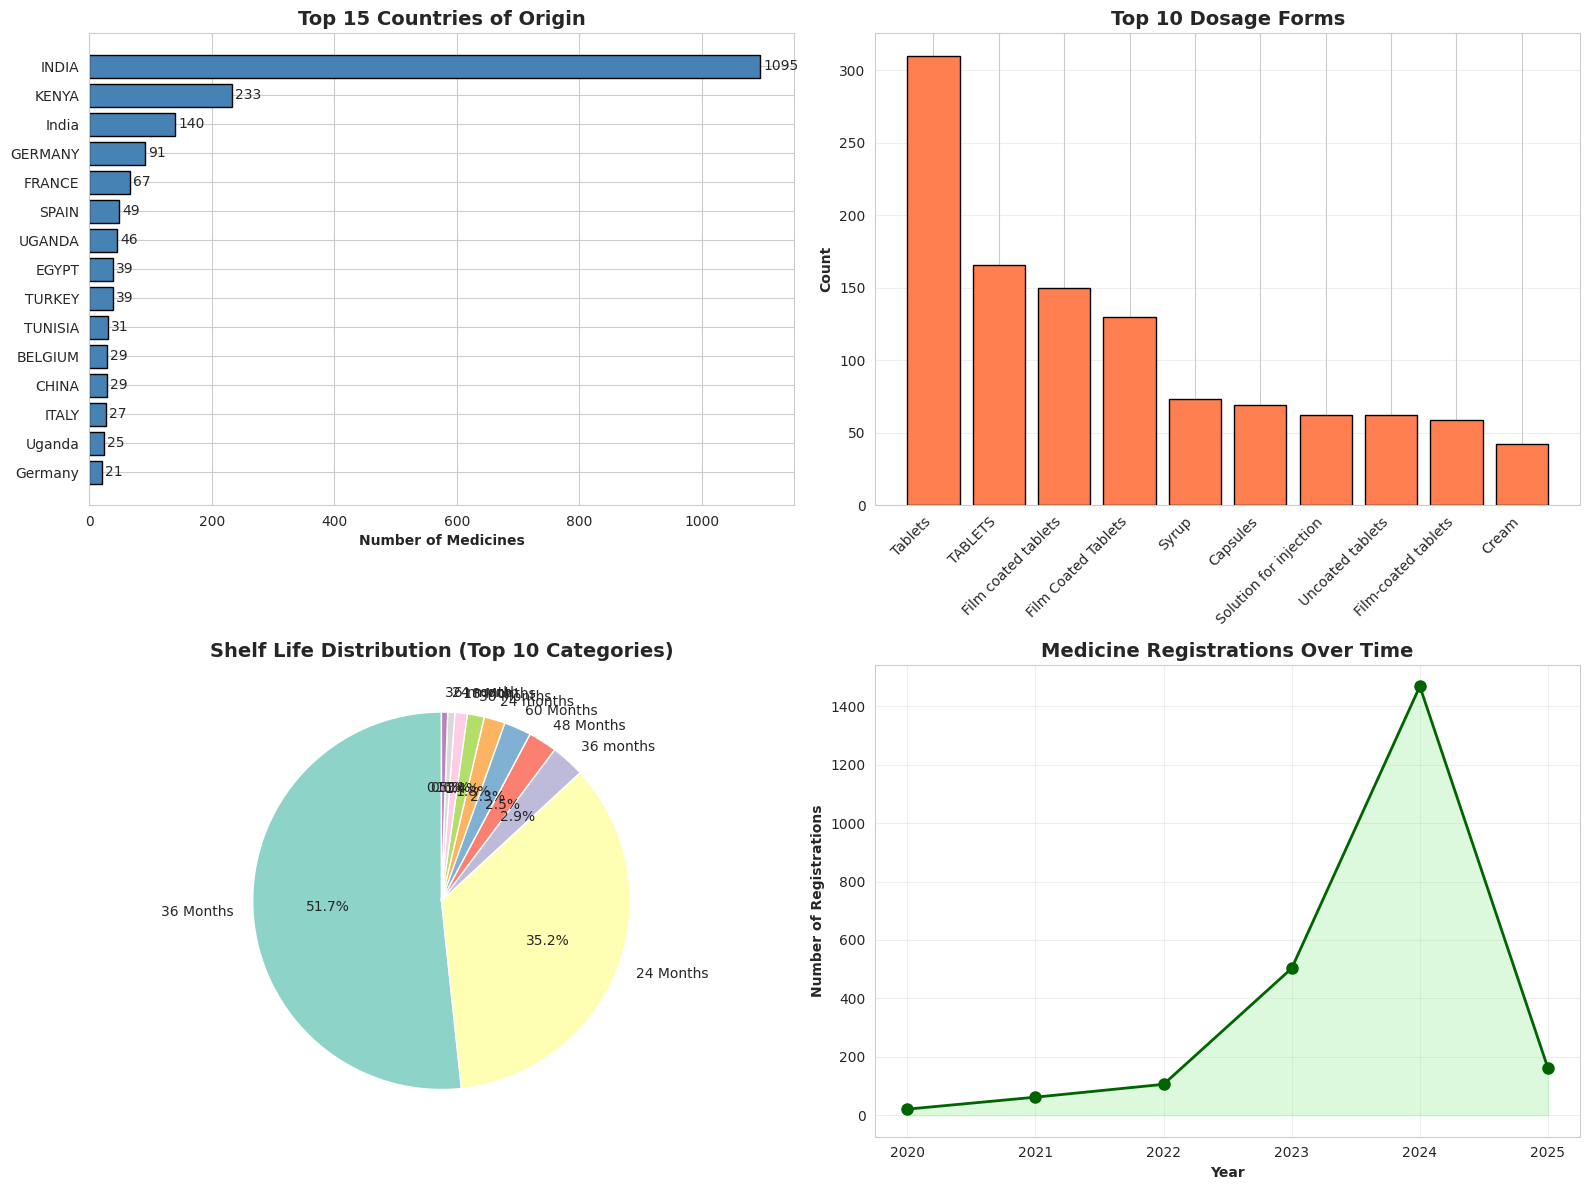

Dataset overview visualization saved as '01_dataset_overview.png'


In [35]:
# Dataset Overview Visualization
"""
Creating comprehensive visualization of dataset characteristics:
1. Top manufacturing countries
2. Dosage form distribution
3. Shelf life distribution
4. Registration timeline
"""

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 Manufacturing Countries
top_manufacturers = df['Manufacturer_Country'].value_counts().head(15)
axes[0, 0].barh(range(len(top_manufacturers)), top_manufacturers.values, color='steelblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_manufacturers)))
axes[0, 0].set_yticklabels(top_manufacturers.index)
axes[0, 0].set_xlabel('Number of Medicines', fontweight='bold')
axes[0, 0].set_title('Top 15 Countries of Origin', fontweight='bold', fontsize=14)
axes[0, 0].invert_yaxis()
for i, v in enumerate(top_manufacturers.values):
    axes[0, 0].text(v + 5, i, str(v), va='center')

# Plot 2: Top 10 Dosage Forms
top_dosage_forms = df['Dosage_Form'].value_counts().head(10)
axes[0, 1].bar(range(len(top_dosage_forms)), top_dosage_forms.values, color='coral', edgecolor='black')
axes[0, 1].set_xticks(range(len(top_dosage_forms)))
axes[0, 1].set_xticklabels(top_dosage_forms.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Count', fontweight='bold')
axes[0, 1].set_title('Top 10 Dosage Forms', fontweight='bold', fontsize=14)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Shelf Life Distribution
shelf_life_counts = df['Shelf_Life'].value_counts().head(10)
colors_pie = plt.cm.Set3(range(len(shelf_life_counts)))
axes[1, 0].pie(shelf_life_counts.values, labels=shelf_life_counts.index,
               autopct='%1.1f%%', startangle=90, colors=colors_pie)
axes[1, 0].set_title('Shelf Life Distribution (Top 10 Categories)', fontweight='bold', fontsize=14)

# Plot 4: Registration Timeline
df['Registration_Date'] = pd.to_datetime(df['Registration_Date'], errors='coerce')
df['Registration_Year'] = df['Registration_Date'].dt.year
yearly_registrations = df[df['Registration_Year'].notna()]['Registration_Year'].astype(int).value_counts().sort_index()
axes[1, 1].plot(yearly_registrations.index, yearly_registrations.values,
                marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1, 1].fill_between(yearly_registrations.index, yearly_registrations.values, alpha=0.3, color='lightgreen')
axes[1, 1].set_xlabel('Year', fontweight='bold')
axes[1, 1].set_ylabel('Number of Registrations', fontweight='bold')
axes[1, 1].set_title('Medicine Registrations Over Time', fontweight='bold', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/UmutiSafe/outputs/figures/01_dataset_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("Dataset overview visualization saved as '01_dataset_overview.png'")

CORRELATION ANALYSIS


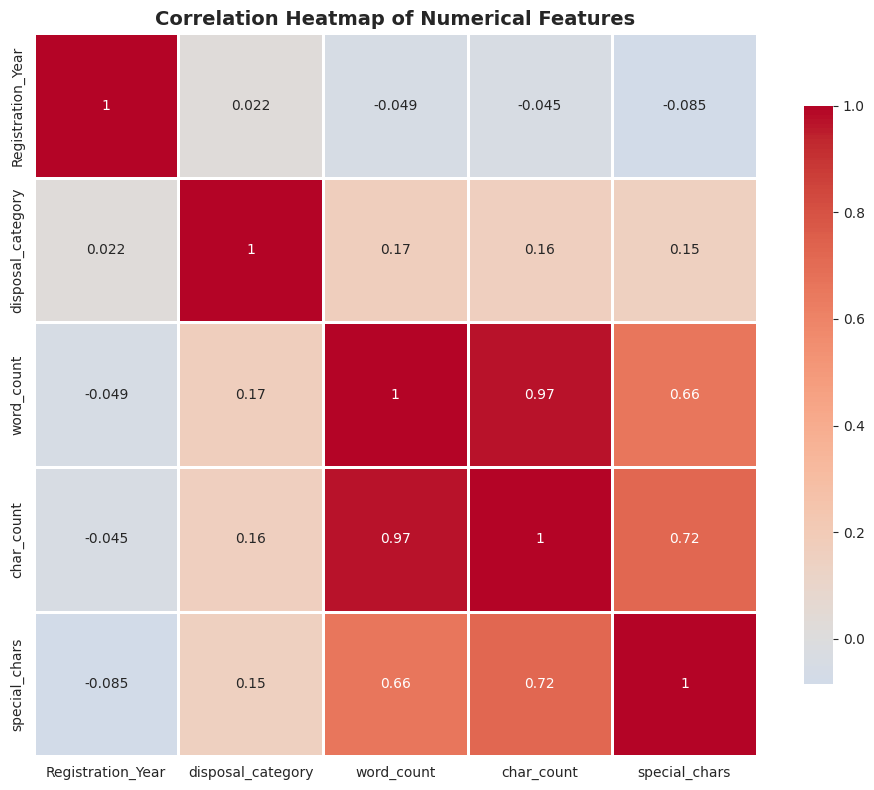

Correlation heatmap saved as '02_correlation_heatmap.png'


In [37]:
# Correlation Analysis
"""
Analyze correlations between numerical features.
Note: Most features are categorical, so correlation matrix may be limited.
"""
print("CORRELATION ANALYSIS")
print("="*80)

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 1:
    corr_matrix = df[numerical_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap of Numerical Features', fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/UmutiSafe/outputs/figures/02_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("Correlation heatmap saved as '02_correlation_heatmap.png'")
else:
    print("Insufficient numerical columns for correlation analysis.")
    print(f"Numerical columns found: {list(numerical_cols)}")

# SECTION 5: FEATURE ENGINEERING

 feature engineering for disposal classification:
- Disposal category classification (5 categories)
- Risk level assessment (HIGH/MEDIUM/LOW)
- Biodegradability detection
- Text feature extraction (word count, character count, special characters)
- Combined text features for NLP processing


In [38]:
# Feature Engineering Functions
"""
feature engineering functions for disposal classification.
These functions implement domain expertise in pharmaceutical waste management.
"""

def classify_dosage_form(dosage_form):
    """
    Classify medicine into disposal categories based on dosage form.

    Categories:
    1: Solids (Tablets, Capsules, Powders)
    2: Liquids (Solutions, Injections, Syrups)
    3: Semisolids (Creams, Ointments, Gels)
    4: Aerosols and Inhalers
    5: Biological Waste (Vaccines, Blood products)

    Args:
        dosage_form (str): Dosage form from medicine label

    Returns:
        int: Disposal category (1-5)
    """
    form = str(dosage_form).lower()

    if any(word in form for word in ['tablet', 'capsule', 'powder', 'granule', 'pill']):
        return 1  # Solids
    elif any(word in form for word in ['solution', 'injection', 'liquid', 'syrup', 'suspension', 'infusion', 'drop']):
        return 2  # Liquids
    elif any(word in form for word in ['cream', 'ointment', 'gel', 'paste', 'lotion', 'emulsion']):
        return 3  # Semisolids
    elif any(word in form for word in ['aerosol', 'inhaler', 'spray', 'mist']):
        return 4  # Aerosols
    elif any(word in form for word in ['vaccine', 'serum', 'blood', 'plasma']):
        return 5  # Biological
    else:
        return 1  # Default to solids

def assess_risk_level(ingredients):
    """
    Assess risk level based on active pharmaceutical ingredients.

    Risk Levels:
    HIGH: Antineoplastic, cytotoxic drugs (require specialized disposal)
    MEDIUM: Antibiotics, controlled substances (require careful disposal)
    LOW: General medicines (standard disposal procedures)

    Args:
        ingredients (str): Active ingredients list

    Returns:
        str: Risk level (HIGH/MEDIUM/LOW)
    """
    ingredients = str(ingredients).lower()

    # High-risk drugs (cytotoxic, antineoplastic)
    high_risk = ['methotrexate', 'doxorubicin', 'cisplatin', 'fluorouracil',
                 'cyclophosphamide', 'vincristine', 'paclitaxel', 'carboplatin',
                 'ifosfamide', 'cytarabine']

    # Medium-risk drugs (antibiotics, controlled substances)
    medium_risk = ['moxifloxacin', 'ciprofloxacin', 'penicillin', 'cephalosporin',
                   'amoxicillin', 'morphine', 'fentanyl', 'oxycodone', 'diazepam',
                   'warfarin', 'heparin', 'azithromycin']

    if any(drug in ingredients for drug in high_risk):
        return 'HIGH'
    elif any(drug in ingredients for drug in medium_risk):
        return 'MEDIUM'
    else:
        return 'LOW'

def check_biodegradable(ingredients):
    """
    Check if liquid medicine is biodegradable.
    Biodegradable medicines can be safely disposed in sewage systems after dilution.

    Args:
        ingredients (str): Active ingredients list

    Returns:
        bool: True if biodegradable, False otherwise
    """
    ingredients = str(ingredients).lower()

    biodegradable_substances = ['vitamin', 'glucose', 'saline', 'amino acid',
                                'sodium chloride', 'dextrose', 'cholecalciferol',
                                'ascorbic acid', 'folic acid', 'thiamine']

    return any(substance in ingredients for substance in biodegradable_substances)

def extract_text_features(text_data):
    """
    Extract statistical text features for ML model input.

    Features:
    - word_count: Number of words in text
    - char_count: Number of characters
    - special_chars: Number of special characters

    Args:
        text_data (pd.Series): Text data series

    Returns:
        pd.DataFrame: DataFrame with extracted features
    """
    features = {}
    features['word_count'] = text_data.apply(lambda x: len(str(x).split()))
    features['char_count'] = text_data.apply(lambda x: len(str(x)))
    features['special_chars'] = text_data.apply(lambda x: len(re.findall(r'[^a-zA-Z0-9\s]', str(x))))

    return pd.DataFrame(features)

print("Feature engineering functions defined successfully.")

Feature engineering functions defined successfully.


## Apply Feature Engineering


In [39]:
# Apply Feature Engineering
"""
Applying feature engineering functions to create new features for ML models.
"""
print("FEATURE ENGINEERING APPLICATION")
print("="*80)

# Create engineered features
df['disposal_category'] = df['Dosage_Form'].apply(classify_dosage_form)
df['risk_level'] = df['Generic_Name'].apply(assess_risk_level)
df['is_biodegradable'] = df['Generic_Name'].apply(check_biodegradable)

# Combine text features for NLP processing
df['combined_text'] = (df['Brand_Name'].astype(str) + ' ' +
                       df['Generic_Name'].astype(str) + ' ' +
                       df['Dosage_Form'].astype(str) + ' ' +
                       df['Packaging_Type'].astype(str))

# Extract additional text features
text_features_df = extract_text_features(df['combined_text'])
df = pd.concat([df, text_features_df], axis=1)

print("Feature engineering complete.")
print("\nDisposal Category Distribution:")
print(df['disposal_category'].value_counts().sort_index())
print("\nRisk Level Distribution:")
print(df['risk_level'].value_counts())
print("\nBiodegradable Medicines:")
print(f"Biodegradable: {df['is_biodegradable'].sum()}")
print(f"Non-biodegradable: {(~df['is_biodegradable']).sum()}")

FEATURE ENGINEERING APPLICATION
Feature engineering complete.

Disposal Category Distribution:
disposal_category
1    1556
2     647
3     113
4       6
Name: count, dtype: int64

Risk Level Distribution:
risk_level
LOW       2149
MEDIUM     160
HIGH        13
Name: count, dtype: int64

Biodegradable Medicines:
Biodegradable: 100
Non-biodegradable: 2222


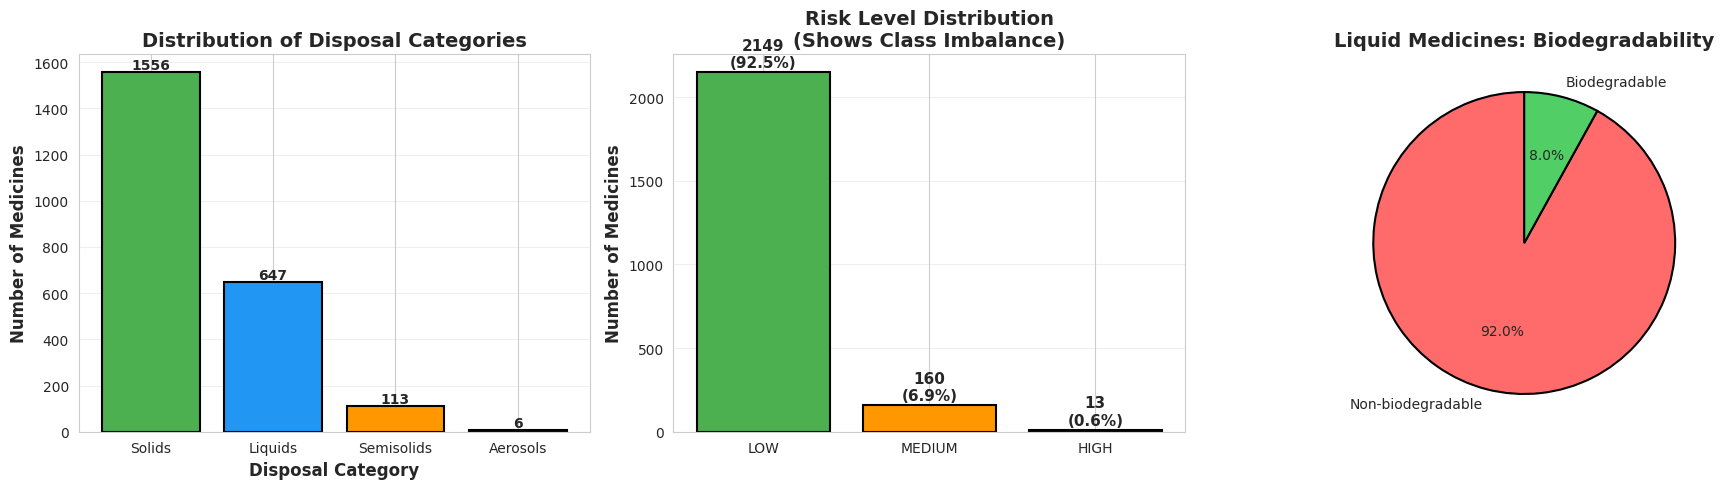

Feature distribution visualization saved as '03_feature_distribution.png'


In [40]:
# Feature Distribution Visualization
"""
This helps understand class imbalance and feature characteristics.
"""

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Disposal Categories Distribution
category_names = {1: 'Solids', 2: 'Liquids', 3: 'Semisolids', 4: 'Aerosols', 5: 'Biological'}
category_counts = df['disposal_category'].value_counts().sort_index()
colors_cat = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#F44336']

bars1 = axes[0].bar(category_counts.index, category_counts.values,
                     color=colors_cat[:len(category_counts)], edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Disposal Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Medicines', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Disposal Categories', fontsize=14, fontweight='bold')
axes[0].set_xticks(category_counts.index)
axes[0].set_xticklabels([category_names.get(i, 'Other') for i in category_counts.index])
axes[0].grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Risk Levels Distribution
risk_counts = df['risk_level'].value_counts()
risk_colors = {'LOW': '#4CAF50', 'MEDIUM': '#FF9800', 'HIGH': '#F44336'}
bars2 = axes[1].bar(risk_counts.index, risk_counts.values,
                     color=[risk_colors[x] for x in risk_counts.index],
                     edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Number of Medicines', fontsize=12, fontweight='bold')
axes[1].set_title('Risk Level Distribution\n(Shows Class Imbalance)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, (label, count) in enumerate(risk_counts.items()):
    axes[1].text(i, count + 30, f'{count}\n({count/len(df)*100:.1f}%)',
                ha='center', fontweight='bold', fontsize=11)

# Plot 3: Biodegradability for Liquids
liquids_df = df[df['disposal_category'] == 2]
bio_counts = liquids_df['is_biodegradable'].value_counts()
labels_bio = ['Non-biodegradable', 'Biodegradable']
axes[2].pie(bio_counts.values, labels=labels_bio, autopct='%1.1f%%',
            colors=['#FF6B6B', '#51CF66'], startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[2].set_title('Liquid Medicines: Biodegradability', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/UmutiSafe/outputs/figures/03_feature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature distribution visualization saved as '03_feature_distribution.png'")

# SECTION 6: TEXT FEATURE EXTRACTION (TF-IDF )

 NLP feature extraction:
- TF-IDF vectorization for term importance
- Combined feature matrix for ML models

In [41]:
# TF-IDF Vectorization
"""
TF-IDF captures the importance of terms in the context of the entire corpus.
"""
print("TF-IDF FEATURE EXTRACTION")
print("="*80)

# Fill missing values in combined_text
df['combined_text'] = df['combined_text'].fillna('')

# Create TF-IDF features
# max_features: Limit to top 100 features to reduce dimensionality
# ngram_range: Use unigrams and bigrams for better context
tfidf = TfidfVectorizer(max_features=100, ngram_range=(1, 2),
                        min_df=2, max_df=0.95)
X_text_tfidf = tfidf.fit_transform(df['combined_text'])

print(f"TF-IDF feature matrix shape: {X_text_tfidf.shape}")
print(f"\nTop 20 TF-IDF features:")
feature_names = tfidf.get_feature_names_out()
print(feature_names[:20])

# Calculate and display feature statistics
tfidf_array = X_text_tfidf.toarray()
feature_importance = np.mean(tfidf_array, axis=0)
top_indices = np.argsort(feature_importance)[-10:]

print("\nTop 10 most important features (by mean TF-IDF score):")
for idx in top_indices[::-1]:
    print(f"  {feature_names[idx]}: {feature_importance[idx]:.4f}")

TF-IDF FEATURE EXTRACTION
TF-IDF feature matrix shape: (2322, 100)

Top 20 TF-IDF features:
['10' '100' '20' '50' '500' '500mg' '5mg' '5ml' 'acid' 'along'
 'along with' 'alu' 'alu alu' 'alu blister' 'alu pvc' 'aluminium'
 'aluminium foil' 'aluminum' 'amber' 'and']

Top 10 most important features (by mean TF-IDF score):
  tablets: 0.1144
  alu: 0.0954
  blister: 0.0727
  pvc: 0.0695
  mg: 0.0687
  and: 0.0605
  bp: 0.0572
  with: 0.0571
  aluminium: 0.0556
  in: 0.0535


# SECTION 7: DATA SPLITTING AND PREPARATION
Preparing data for model training:
- Split into training and testing sets
- Encode target variables
- Verify data splits

In [43]:
# Train-Test Split
"""
Used stratified splitting to maintain class distribution.
"""

print("="*80)
print("DATA SPLITTING")
print("="*80)

# Prepare target variables
y_category = df['disposal_category']
y_risk = df['risk_level']

# Encode risk levels for compatibility with some models
le_category = LabelEncoder()
le_risk = LabelEncoder()
y_category_encoded = le_category.fit_transform(y_category)
y_risk_encoded = le_risk.fit_transform(y_risk)

# Create the feature matrix X by combining available features
# Assuming X_text_tfidf from cell 6.1 and text_features_df from cell 5.2 are available
X = np.hstack((X_text_tfidf.toarray(), text_features_df.values))


# Split data with stratification to maintain class distribution
X_train, X_test, y_cat_train, y_cat_test, y_risk_train, y_risk_test = train_test_split(
    X, y_category_encoded, y_risk_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_category_encoded
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining category distribution:")
for cat in np.unique(y_cat_train):
    count = np.sum(y_cat_train == cat)
    print(f"  Category {cat}: {count} samples ({count/len(y_cat_train)*100:.1f}%)")

print(f"\nTraining risk distribution:")
for risk_idx, risk_name in enumerate(le_risk.classes_):
    count = np.sum(y_risk_train == risk_idx)
    print(f"  {risk_name}: {count} samples ({count/len(y_risk_train)*100:.1f}%)")

DATA SPLITTING
Training set size: 1857 samples (80.0%)
Testing set size: 465 samples (20.0%)

Training category distribution:
  Category 0: 1244 samples (67.0%)
  Category 1: 518 samples (27.9%)
  Category 2: 90 samples (4.8%)
  Category 3: 5 samples (0.3%)

Training risk distribution:
  HIGH: 11 samples (0.6%)
  LOW: 1721 samples (92.7%)
  MEDIUM: 125 samples (6.7%)


# SECTION 8: CLASS IMBALANCE HANDLING
Addressing class imbalance in risk level classification:
- Compute class weights
- Apply SMOTE (Synthetic Minority Over-sampling Technique)
- Visualize before/after distributions

In [44]:
#  Class Imbalance Analysis and SMOTE
"""
This is critical for HIGH-risk drug detection.
"""
print("CLASS IMBALANCE HANDLING")
print("="*80)

# Original distribution
print("Original Risk Level Distribution (Training Set):")
risk_train_decoded = le_risk.inverse_transform(y_risk_train)
risk_distribution = pd.Series(risk_train_decoded).value_counts()
print(risk_distribution)

# Calculate imbalance ratio
high_count = np.sum(risk_train_decoded == 'HIGH')
low_count = np.sum(risk_train_decoded == 'LOW')
if high_count > 0:
    imbalance_ratio = low_count / high_count
    print(f"\nImbalance Ratio (LOW:HIGH): {imbalance_ratio:.1f}:1")
else:
    print("\nWarning: No HIGH-risk drugs in training set")

# Compute class weights
classes_risk = np.unique(y_risk_train)
class_weights_risk = compute_class_weight('balanced',
                                          classes=classes_risk,
                                          y=y_risk_train)
class_weight_dict_risk = dict(zip(classes_risk, class_weights_risk))

print("\nComputed Class Weights:")
for cls, weight in class_weight_dict_risk.items():
    class_name = le_risk.inverse_transform([cls])[0]
    print(f"  {class_name}: {weight:.2f}x")

# Apply SMOTE
print("\nApplying SMOTE (Synthetic Minority Over-sampling)...")
k_neighbors = min(3, high_count - 1) if high_count > 1 else 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_balanced, y_risk_train_balanced = smote.fit_resample(X_train, y_risk_train)

print(f"\nBalanced Risk Level Distribution:")
risk_balanced_decoded = le_risk.inverse_transform(y_risk_train_balanced)
balanced_distribution = pd.Series(risk_balanced_decoded).value_counts()
print(balanced_distribution)

print(f"\nDataset size change:")
print(f"  Before SMOTE: {X_train.shape[0]} samples")
print(f"  After SMOTE: {X_train_balanced.shape[0]} samples")
print(f"  Increase: {X_train_balanced.shape[0] - X_train.shape[0]} samples")

CLASS IMBALANCE HANDLING
Original Risk Level Distribution (Training Set):
LOW       1721
MEDIUM     125
HIGH        11
Name: count, dtype: int64

Imbalance Ratio (LOW:HIGH): 156.5:1

Computed Class Weights:
  HIGH: 56.27x
  LOW: 0.36x
  MEDIUM: 4.95x

Applying SMOTE (Synthetic Minority Over-sampling)...

Balanced Risk Level Distribution:
LOW       1721
MEDIUM    1721
HIGH      1721
Name: count, dtype: int64

Dataset size change:
  Before SMOTE: 1857 samples
  After SMOTE: 5163 samples
  Increase: 3306 samples


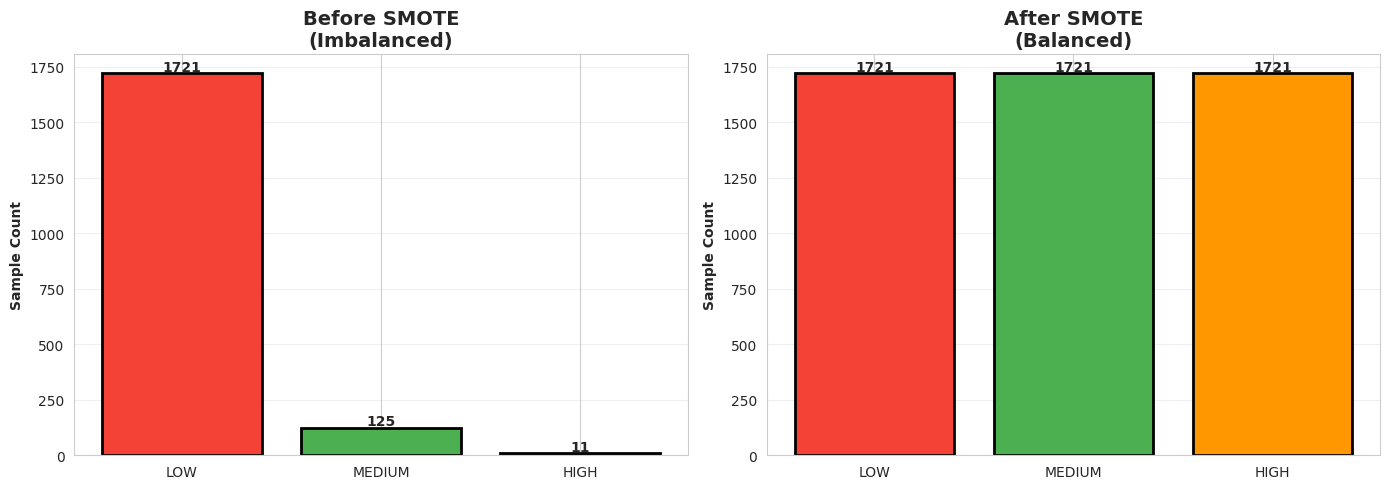

SMOTE balancing visualization saved as '04_smote_balancing.png'


In [45]:
# Visualizing SMOTE Balancing
"""
to see the effect of SMOTE on class distribution.
"""

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before SMOTE
before_counts = pd.Series(le_risk.inverse_transform(y_risk_train)).value_counts()
colors = ['#F44336', '#4CAF50', '#FF9800']
axes[0].bar(range(len(before_counts)), before_counts.values,
            color=colors[:len(before_counts)], edgecolor='black', linewidth=2)
axes[0].set_xticks(range(len(before_counts)))
axes[0].set_xticklabels(before_counts.index)
axes[0].set_title('Before SMOTE\n(Imbalanced)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sample Count', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, count in enumerate(before_counts.values):
    axes[0].text(i, count + 10, str(count), ha='center', fontweight='bold')

# After SMOTE
after_counts = pd.Series(le_risk.inverse_transform(y_risk_train_balanced)).value_counts()
axes[1].bar(range(len(after_counts)), after_counts.values,
            color=colors[:len(after_counts)], edgecolor='black', linewidth=2)
axes[1].set_xticks(range(len(after_counts)))
axes[1].set_xticklabels(after_counts.index)
axes[1].set_title('After SMOTE\n(Balanced)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sample Count', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, count in enumerate(after_counts.values):
    axes[1].text(i, count + 10, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/UmutiSafe/outputs/figures/04_smote_balancing.png', dpi=300, bbox_inches='tight')
plt.show()

print("SMOTE balancing visualization saved as '04_smote_balancing.png'")

# SECTION 9: MODEL TRAINING - DISPOSAL CATEGORY CLASSIFICATION
Trained multiple models for disposal category prediction:

1. Random Forest Classifier (baseline)
2. Random Forest with GridSearchCV (hyperparameter tuning)
3. Decision Tree Classifier
4. Regression Tree (for comparison)
5. Gradient Boosting Classifier
6. Multi-Layer Perceptron Neural Network

In [46]:
#  Random Forest Baseline

print("\n1. Random Forest Classifier (Baseline)")
print("-" * 80)

category_model_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
category_model_rf.fit(X_train, y_cat_train)
y_cat_pred_rf = category_model_rf.predict(X_test)
acc_rf = accuracy_score(y_cat_test, y_cat_pred_rf)

print(f"Accuracy: {acc_rf:.4f} ({acc_rf*100:.2f}%)")
print(f"Number of trees: {category_model_rf.n_estimators}")
print(f"Max features: {category_model_rf.max_features}")


1. Random Forest Classifier (Baseline)
--------------------------------------------------------------------------------
Accuracy: 0.9871 (98.71%)
Number of trees: 100
Max features: sqrt


In [47]:
#  Random Forest with Hyperparameter Tuning
"""
Performed GridSearchCV to find optimal hyperparameters for Random Forest.
"""

print("\n2. Random Forest with GridSearchCV (Hyperparameter Tuning)")
print("-" * 80)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=1), # Changed n_jobs to 1
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=1, # Changed n_jobs to 1
    verbose=1
)
grid_search_rf.fit(X_train, y_cat_train)
category_model_tuned = grid_search_rf.best_estimator_
y_cat_pred_tuned = category_model_tuned.predict(X_test)
acc_tuned = accuracy_score(y_cat_test, y_cat_pred_tuned)

print(f"\nBest Parameters: {grid_search_rf.best_params_}")
print(f"Best CV Score: {grid_search_rf.best_score_:.4f}")
print(f"Test Accuracy: {acc_tuned:.4f} ({acc_tuned*100:.2f}%)")


2. Random Forest with GridSearchCV (Hyperparameter Tuning)
--------------------------------------------------------------------------------
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.9801
Test Accuracy: 0.9871 (98.71%)


In [48]:
# Decision Tree Classifier
"""
Train Decision Tree model with pruning to prevent overfitting.
"""

print("\n3. Decision Tree Classifier")
print("-" * 80)

category_model_dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5
)
category_model_dt.fit(X_train, y_cat_train)
y_cat_pred_dt = category_model_dt.predict(X_test)
acc_dt = accuracy_score(y_cat_test, y_cat_pred_dt)

print(f"Accuracy: {acc_dt:.4f} ({acc_dt*100:.2f}%)")
print(f"Tree depth: {category_model_dt.get_depth()}")
print(f"Number of leaves: {category_model_dt.get_n_leaves()}")


3. Decision Tree Classifier
--------------------------------------------------------------------------------
Accuracy: 0.9656 (96.56%)
Tree depth: 15
Number of leaves: 25


In [49]:
# Regression Tree (for comparison)
"""
This provided a different perspective on the classification problem.
"""

print("\n4. Regression Tree (Continuous Target Approximation)")
print("-" * 80)

category_model_reg_tree = DecisionTreeRegressor(
    random_state=42,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5
)
category_model_reg_tree.fit(X_train, y_cat_train)
y_cat_pred_reg_tree = category_model_reg_tree.predict(X_test)
y_cat_pred_reg_tree_rounded = np.round(y_cat_pred_reg_tree).astype(int)
# Clip values to valid category range
y_cat_pred_reg_tree_rounded = np.clip(y_cat_pred_reg_tree_rounded,
                                       y_cat_train.min(),
                                       y_cat_train.max())
acc_reg_tree = accuracy_score(y_cat_test, y_cat_pred_reg_tree_rounded)
mse_reg_tree = mean_squared_error(y_cat_test, y_cat_pred_reg_tree)
r2_reg_tree = r2_score(y_cat_test, y_cat_pred_reg_tree)

print(f"Accuracy (after rounding): {acc_reg_tree:.4f} ({acc_reg_tree*100:.2f}%)")
print(f"Mean Squared Error: {mse_reg_tree:.4f}")
print(f"R-squared Score: {r2_reg_tree:.4f}")
print(f"Tree depth: {category_model_reg_tree.get_depth()}")


4. Regression Tree (Continuous Target Approximation)
--------------------------------------------------------------------------------
Accuracy (after rounding): 0.9656 (96.56%)
Mean Squared Error: 0.0404
R-squared Score: 0.8840
Tree depth: 15


In [50]:
#Gradient Boosting Classifier
"""
Gradient Boosting model for ensemble learning.
"""

print("\n5. Gradient Boosting Classifier")
print("-" * 80)

category_model_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
category_model_gb.fit(X_train, y_cat_train)
y_cat_pred_gb = category_model_gb.predict(X_test)
acc_gb = accuracy_score(y_cat_test, y_cat_pred_gb)

print(f"Accuracy: {acc_gb:.4f} ({acc_gb*100:.2f}%)")
print(f"Number of boosting stages: {category_model_gb.n_estimators}")
print(f"Learning rate: {category_model_gb.learning_rate}")


5. Gradient Boosting Classifier
--------------------------------------------------------------------------------
Accuracy: 0.9828 (98.28%)
Number of boosting stages: 100
Learning rate: 0.1


In [51]:
#  Neural Network
"""
Multi-Layer Perceptron with GridSearchCV for optimal architecture.
"""

print("\n6. Multi-Layer Perceptron Neural Network ")
print("-" * 80)

param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

mlp_category = MLPClassifier(
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

grid_search_mlp_cat = GridSearchCV(
    mlp_category,
    param_grid_mlp,
    cv=3,
    scoring='accuracy',
    n_jobs=1, # Changed n_jobs to 1
    verbose=1
)
grid_search_mlp_cat.fit(X_train, y_cat_train)
category_model_mlp = grid_search_mlp_cat.best_estimator_
y_cat_pred_mlp = category_model_mlp.predict(X_test)
acc_mlp = accuracy_score(y_cat_test, y_cat_pred_mlp)

print(f"\nBest Parameters: {grid_search_mlp_cat.best_params_}")
print(f"Best CV Score: {grid_search_mlp_cat.best_score_:.4f}")
print(f"Test Accuracy: {acc_mlp:.4f} ({acc_mlp*100:.2f}%)")
print(f"Training iterations: {category_model_mlp.n_iter_}")


6. Multi-Layer Perceptron Neural Network 
--------------------------------------------------------------------------------
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.01}
Best CV Score: 0.9688
Test Accuracy: 0.9871 (98.71%)
Training iterations: 38


####**Category Model Comparison and Selection**

In [52]:
#Category Model Comparison and Selection
"""
Comparing all category classification models and select the best one.
"""

print("\n" + "="*80)
print("CATEGORY MODEL COMPARISON")
print("="*80)

category_models = {
    'Random Forest (Baseline)': (category_model_rf, y_cat_pred_rf, acc_rf),
    'Random Forest (Tuned)': (category_model_tuned, y_cat_pred_tuned, acc_tuned),
    'Decision Tree': (category_model_dt, y_cat_pred_dt, acc_dt),
    'Regression Tree': (category_model_reg_tree, y_cat_pred_reg_tree_rounded, acc_reg_tree),
    'Gradient Boosting': (category_model_gb, y_cat_pred_gb, acc_gb),
    'Neural Network': (category_model_mlp, y_cat_pred_mlp, acc_mlp)
}

comparison_df = pd.DataFrame({
    'Model': list(category_models.keys()),
    'Accuracy': [acc_rf, acc_tuned, acc_dt, acc_reg_tree, acc_gb, acc_mlp]
}).sort_values('Accuracy', ascending=False)

print("\nModel Performance Ranking:")
print(comparison_df.to_string(index=False))

# Select best model
best_category_model_name = max(category_models.keys(), key=lambda k: category_models[k][2])
best_category_model = category_models[best_category_model_name][0]
best_cat_pred = category_models[best_category_model_name][1]
best_cat_acc = category_models[best_category_model_name][2]

print(f"\nBest Model Selected: {best_category_model_name}")
print(f"Test Accuracy: {best_cat_acc:.4f} ({best_cat_acc*100:.2f}%)")


CATEGORY MODEL COMPARISON

Model Performance Ranking:
                   Model  Accuracy
Random Forest (Baseline)  0.987097
   Random Forest (Tuned)  0.987097
          Neural Network  0.987097
       Gradient Boosting  0.982796
         Regression Tree  0.965591
           Decision Tree  0.965591

Best Model Selected: Random Forest (Baseline)
Test Accuracy: 0.9871 (98.71%)


# SECTION 10: MODEL ARCHITECTURE DOCUMENTATION
 this is the architecture of all trained models:
- Model structure
- Hyperparameters
- Activation functions
- Optimization techniques

In [53]:
#Model Architecture Documentation
"""
Comprehensive documentation of all model architectures and configurations.
"""

print("*MODEL ARCHITECTURE DOCUMENTATION*")
print("="*80)

print("\n1. RANDOM FOREST CLASSIFIER (BASELINE)")
print("-" * 80)
print("Architecture: Ensemble of Decision Trees")
print(f"  Number of Estimators: {category_model_rf.n_estimators}")
print(f"  Criterion: {category_model_rf.criterion}")
print(f"  Max Features: {category_model_rf.max_features}")
print(f"  Bootstrap: {category_model_rf.bootstrap}")
print("Optimization: Bagging with random feature selection")
print("Activation: N/A (Tree-based model)")

print("\n2. RANDOM FOREST CLASSIFIER (TUNED)")
print("-" * 80)
print("Architecture: Optimized Ensemble of Decision Trees")
print(f"  Number of Estimators: {category_model_tuned.n_estimators}")
print(f"  Max Depth: {category_model_tuned.max_depth}")
print(f"  Min Samples Split: {category_model_tuned.min_samples_split}")
print(f"  Min Samples Leaf: {category_model_tuned.min_samples_leaf}")
print("Optimization: GridSearchCV with 5-fold cross-validation")
print("Hyperparameter Space: n_estimators, max_depth, min_samples_split, min_samples_leaf")

print("\n3. DECISION TREE CLASSIFIER")
print("-" * 80)
print("Architecture: Single Decision Tree with Pruning")
print(f"  Criterion: {category_model_dt.criterion}")
print(f"  Max Depth: {category_model_dt.max_depth}")
print(f"  Min Samples Split: {category_model_dt.min_samples_split}")
print(f"  Min Samples Leaf: {category_model_dt.min_samples_leaf}")
print(f"  Tree Depth (actual): {category_model_dt.get_depth()}")
print(f"  Number of Leaves: {category_model_dt.get_n_leaves()}")
print("Optimization: Gini impurity minimization with pruning")

print("\n4. REGRESSION TREE")
print("-" * 80)
print("Architecture: Decision Tree Regressor")
print(f"  Criterion: {category_model_reg_tree.criterion}")
print(f"  Max Depth: {category_model_reg_tree.max_depth}")
print(f"  Min Samples Split: {category_model_reg_tree.min_samples_split}")
print(f"  Min Samples Leaf: {category_model_reg_tree.min_samples_leaf}")
print("Optimization: Mean squared error minimization")
print("Note: Predictions rounded to nearest integer for classification")

print("\n5. GRADIENT BOOSTING CLASSIFIER")
print("-" * 80)
print("Architecture: Sequential Ensemble of Weak Learners")
print(f"  Number of Estimators: {category_model_gb.n_estimators}")
print(f"  Learning Rate: {category_model_gb.learning_rate}")
print(f"  Max Depth: {category_model_gb.max_depth}")
print(f"  Subsample: {category_model_gb.subsample}")
print("Optimization: Gradient descent on loss function (deviance)")
print("Loss Function: Log loss for multi-class classification")

print("\n6. MULTI-LAYER PERCEPTRON NEURAL NETWORK")
print("-" * 80)
print("Architecture: Feedforward Neural Network")
print(f"  Input Layer: {X_train.shape[1]} neurons (features)")
print(f"  Hidden Layers: {category_model_mlp.hidden_layer_sizes}")
for i, layer_size in enumerate(category_model_mlp.hidden_layer_sizes):
    print(f"    Hidden Layer {i+1}: {layer_size} neurons")
print(f"  Output Layer: {len(np.unique(y_cat_train))} neurons (categories)")
print(f"\nActivation Function: {category_model_mlp.activation}")
print(f"  Hidden Layers: {category_model_mlp.activation}")
print(f"  Output Layer: softmax (multi-class)")
print(f"\nOptimizer: {category_model_mlp.solver}")
print(f"  Learning Rate: {category_model_mlp.learning_rate}")
print(f"  Initial Learning Rate: {category_model_mlp.learning_rate_init}")
print(f"  Alpha (L2 Regularization): {category_model_mlp.alpha}")
print(f"\nTraining Configuration:")
print(f"  Max Iterations: {category_model_mlp.max_iter}")
print(f"  Actual Iterations: {category_model_mlp.n_iter_}")
print(f"  Early Stopping: {category_model_mlp.early_stopping}")
print(f"  Validation Fraction: {category_model_mlp.validation_fraction}")
print(f"  Batch Size: {category_model_mlp.batch_size}")

*MODEL ARCHITECTURE DOCUMENTATION*

1. RANDOM FOREST CLASSIFIER (BASELINE)
--------------------------------------------------------------------------------
Architecture: Ensemble of Decision Trees
  Number of Estimators: 100
  Criterion: gini
  Max Features: sqrt
  Bootstrap: True
Optimization: Bagging with random feature selection
Activation: N/A (Tree-based model)

2. RANDOM FOREST CLASSIFIER (TUNED)
--------------------------------------------------------------------------------
Architecture: Optimized Ensemble of Decision Trees
  Number of Estimators: 200
  Max Depth: None
  Min Samples Split: 2
  Min Samples Leaf: 1
Optimization: GridSearchCV with 5-fold cross-validation
Hyperparameter Space: n_estimators, max_depth, min_samples_split, min_samples_leaf

3. DECISION TREE CLASSIFIER
--------------------------------------------------------------------------------
Architecture: Single Decision Tree with Pruning
  Criterion: gini
  Max Depth: 15
  Min Samples Split: 10
  Min Samples Le

# SECTION 11: MODEL TRAINING - RISK LEVEL CLASSIFICATION
Training models for risk level classification:
- Using balanced data (SMOTE)
- Apply class weights
- Train multiple models
- Select best model for HIGH-risk detection

In [54]:
#  Random Forest with Class Weights
"""
 Random Forest with class weights for risk classification.
"""

print("RISK LEVEL CLASSIFICATION - MODEL TRAINING")
print("="*80)

print("\n1. Random Forest with Class Weights")
print("-" * 80)

risk_model_weighted = RandomForestClassifier(
    n_estimators=100,
    class_weight=class_weight_dict_risk,
    random_state=42,
    n_jobs=-1
)
risk_model_weighted.fit(X_train, y_risk_train)
y_risk_pred_weighted = risk_model_weighted.predict(X_test)
acc_weighted = accuracy_score(y_risk_test, y_risk_pred_weighted)
f1_weighted = f1_score(y_risk_test, y_risk_pred_weighted, average='macro')

print(f"Accuracy: {acc_weighted:.4f} ({acc_weighted*100:.2f}%)")
print(f"F1-Score (macro): {f1_weighted:.4f}")

RISK LEVEL CLASSIFICATION - MODEL TRAINING

1. Random Forest with Class Weights
--------------------------------------------------------------------------------
Accuracy: 0.9226 (92.26%)
F1-Score (macro): 0.5601


In [55]:
# Random Forest with SMOTE
"""
Random Forest on SMOTE-balanced data.
"""

print("\n2. Random Forest with SMOTE")
print("-" * 80)

risk_model_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
risk_model_smote.fit(X_train_balanced, y_risk_train_balanced)
y_risk_pred_smote = risk_model_smote.predict(X_test)
acc_smote = accuracy_score(y_risk_test, y_risk_pred_smote)
f1_smote = f1_score(y_risk_test, y_risk_pred_smote, average='macro')

print(f"Accuracy: {acc_smote:.4f} ({acc_smote*100:.2f}%)")
print(f"F1-Score (macro): {f1_smote:.4f}")



2. Random Forest with SMOTE
--------------------------------------------------------------------------------
Accuracy: 0.9269 (92.69%)
F1-Score (macro): 0.6420


In [56]:
# Cell 11.3: Gradient Boosting with SMOTE
"""
Gradient Boosting on balanced data.
"""

print("\n3. Gradient Boosting with SMOTE")
print("-" * 80)

risk_model_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
risk_model_gb.fit(X_train_balanced, y_risk_train_balanced)
y_risk_pred_gb = risk_model_gb.predict(X_test)
acc_gb_risk = accuracy_score(y_risk_test, y_risk_pred_gb)
f1_gb_risk = f1_score(y_risk_test, y_risk_pred_gb, average='macro')

print(f"Accuracy: {acc_gb_risk:.4f} ({acc_gb_risk*100:.2f}%)")
print(f"F1-Score (macro): {f1_gb_risk:.4f}")


3. Gradient Boosting with SMOTE
--------------------------------------------------------------------------------
Accuracy: 0.8989 (89.89%)
F1-Score (macro): 0.5693


In [57]:
# Neural Network with Hyperparameter Tuning

print("\n4. Neural Network with  (SMOTE)")
print("-" * 80)

param_grid_mlp_risk = {
    'hidden_layer_sizes': [(64,), (128, 64), (64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

grid_search_mlp_risk = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=42, early_stopping=True),
    param_grid_mlp_risk,
    cv=3,
    scoring='f1_macro',
    n_jobs=1,
    verbose=1
)
grid_search_mlp_risk.fit(X_train_balanced, y_risk_train_balanced)
risk_model_mlp = grid_search_mlp_risk.best_estimator_
y_risk_pred_mlp = risk_model_mlp.predict(X_test)
acc_mlp_risk = accuracy_score(y_risk_test, y_risk_pred_mlp)
f1_mlp_risk = f1_score(y_risk_test, y_risk_pred_mlp, average='macro')

print(f"\nBest Parameters: {grid_search_mlp_risk.best_params_}")
print(f"Best CV F1-Score: {grid_search_mlp_risk.best_score_:.4f}")
print(f"Test Accuracy: {acc_mlp_risk:.4f} ({acc_mlp_risk*100:.2f}%)")
print(f"Test F1-Score (macro): {f1_mlp_risk:.4f}")


4. Neural Network with  (SMOTE)
--------------------------------------------------------------------------------
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.01}
Best CV F1-Score: 0.9601
Test Accuracy: 0.8839 (88.39%)
Test F1-Score (macro): 0.5170


In [58]:
# Risk Model Comparison and Selection
"""
Compare risk models prioritizing HIGH-risk recall.
"""

print("RISK MODEL COMPARISON")
print("="*80)

# Calculate HIGH-risk recall for each model
report_weighted = classification_report(y_risk_test, y_risk_pred_weighted,
                                       target_names=le_risk.classes_,
                                       output_dict=True, zero_division=0)
report_smote = classification_report(y_risk_test, y_risk_pred_smote,
                                     target_names=le_risk.classes_,
                                     output_dict=True, zero_division=0)
report_gb = classification_report(y_risk_test, y_risk_pred_gb,
                                  target_names=le_risk.classes_,
                                  output_dict=True, zero_division=0)
report_mlp = classification_report(y_risk_test, y_risk_pred_mlp,
                                   target_names=le_risk.classes_,
                                   output_dict=True, zero_division=0)

high_recall_weighted = report_weighted.get('HIGH', {}).get('recall', 0)
high_recall_smote = report_smote.get('HIGH', {}).get('recall', 0)
high_recall_gb = report_gb.get('HIGH', {}).get('recall', 0)
high_recall_mlp = report_mlp.get('HIGH', {}).get('recall', 0)

risk_comparison = pd.DataFrame({
    'Model': ['RF + Weights', 'RF + SMOTE', 'GB + SMOTE', 'NN + SMOTE'],
    'Accuracy': [acc_weighted, acc_smote, acc_gb_risk, acc_mlp_risk],
    'F1-Score': [f1_weighted, f1_smote, f1_gb_risk, f1_mlp_risk],
    'HIGH_Recall': [high_recall_weighted, high_recall_smote, high_recall_gb, high_recall_mlp]
}).sort_values('HIGH_Recall', ascending=False)

print("\nModel Performance Ranking (by HIGH-risk recall):")
print(risk_comparison.to_string(index=False))

# Select best model based on HIGH-risk recall
best_idx = risk_comparison['HIGH_Recall'].idxmax()
risk_models_list = [risk_model_weighted, risk_model_smote, risk_model_gb, risk_model_mlp]
best_risk_preds = [y_risk_pred_weighted, y_risk_pred_smote, y_risk_pred_gb, y_risk_pred_mlp]

best_risk_model = risk_models_list[best_idx]
best_risk_pred = best_risk_preds[best_idx]
best_risk_name = risk_comparison.loc[best_idx, 'Model']

print(f"\nBest Model Selected: {best_risk_name}")
print(f"HIGH-risk Recall: {risk_comparison.loc[best_idx, 'HIGH_Recall']:.4f}")
print(f"Overall F1-Score: {risk_comparison.loc[best_idx, 'F1-Score']:.4f}")

RISK MODEL COMPARISON

Model Performance Ranking (by HIGH-risk recall):
       Model  Accuracy  F1-Score  HIGH_Recall
RF + Weights  0.922581  0.560090          0.5
  RF + SMOTE  0.926882  0.641968          0.5
  GB + SMOTE  0.898925  0.569320          0.5
  NN + SMOTE  0.883871  0.516984          0.5

Best Model Selected: RF + Weights
HIGH-risk Recall: 0.5000
Overall F1-Score: 0.5601


# SECTION 12: MODEL EVALUATION AND PERFORMANCE METRICS
Comprehensive models evaluation:
- Classification reports
- Confusion matrices
- Performance metrics (accuracy, precision, recall, F1-score)
- Cross-validation results

DISPOSAL CATEGORY MODEL EVALUATION
Model: Random Forest (Baseline)

Classification Report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       312
           2       0.97      0.99      0.98       129
           3       0.95      0.91      0.93        23
           4       0.00      0.00      0.00         1

    accuracy                           0.99       465
   macro avg       0.73      0.72      0.73       465
weighted avg       0.99      0.99      0.99       465


Overall Metrics:
--------------------------------------------------------------------------------
Accuracy:  0.9871 (98.71%)
Precision (weighted): 0.9850
Recall (weighted):    0.9871
F1-Score (weighted):  0.9860


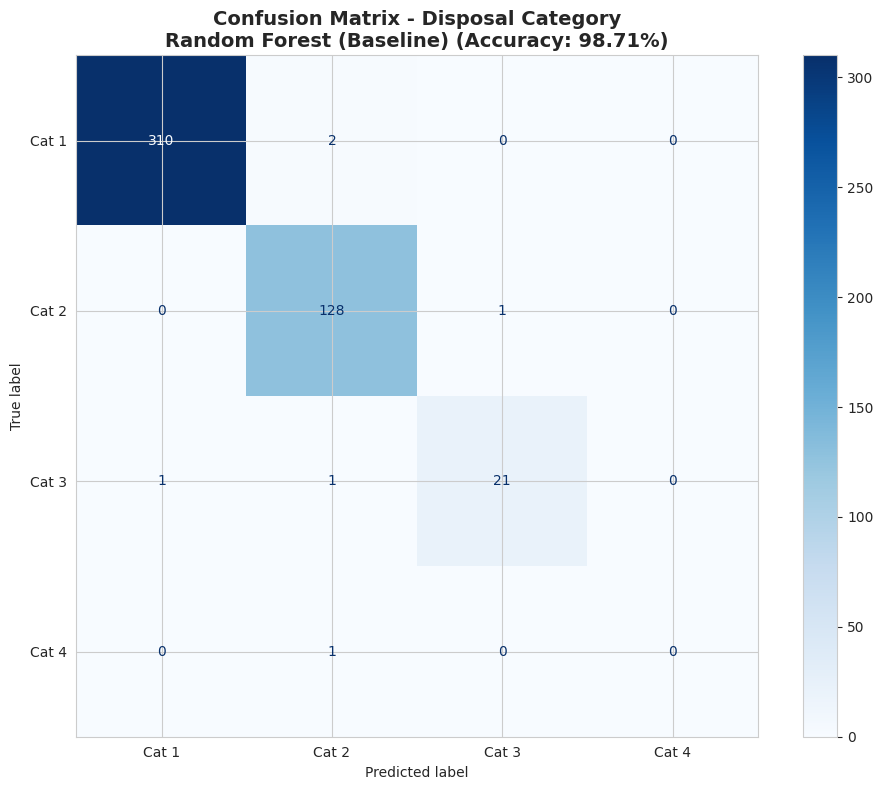


Confusion matrix saved as '05_category_confusion_matrix.png'


In [59]:
# Category Model Evaluation

print("DISPOSAL CATEGORY MODEL EVALUATION")
print(f"Model: {best_category_model_name}")
print("="*80)

# Classification Report
print("\nClassification Report:")
print("-" * 80)
cat_report = classification_report(y_cat_test, best_cat_pred,
                                   target_names=[str(i) for i in le_category.classes_],
                                   zero_division=0)
print(cat_report)

# Calculate detailed metrics
acc_cat = accuracy_score(y_cat_test, best_cat_pred)
prec_cat = precision_score(y_cat_test, best_cat_pred, average='weighted', zero_division=0)
rec_cat = recall_score(y_cat_test, best_cat_pred, average='weighted', zero_division=0)
f1_cat = f1_score(y_cat_test, best_cat_pred, average='weighted', zero_division=0)

print("\nOverall Metrics:")
print("-" * 80)
print(f"Accuracy:  {acc_cat:.4f} ({acc_cat*100:.2f}%)")
print(f"Precision (weighted): {prec_cat:.4f}")
print(f"Recall (weighted):    {rec_cat:.4f}")
print(f"F1-Score (weighted):  {f1_cat:.4f}")

# Confusion Matrix Visualization
fig, ax = plt.subplots(figsize=(10, 8))
cm_cat = confusion_matrix(y_cat_test, best_cat_pred)
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat,
                                   display_labels=[f"Cat {i}" for i in le_category.classes_])
disp_cat.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title(f'Confusion Matrix - Disposal Category\n{best_category_model_name} (Accuracy: {acc_cat:.2%})',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/UmutiSafe/outputs/figures/05_category_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nConfusion matrix saved as '05_category_confusion_matrix.png'")

RISK LEVEL MODEL EVALUATION
Model: RF + Weights

Classification Report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

        HIGH       1.00      0.50      0.67         2
         LOW       0.92      1.00      0.96       428
      MEDIUM       0.50      0.03      0.05        35

    accuracy                           0.92       465
   macro avg       0.81      0.51      0.56       465
weighted avg       0.89      0.92      0.89       465


Overall Metrics:
--------------------------------------------------------------------------------
Accuracy:  0.9226 (92.26%)
Precision (weighted): 0.8926
Recall (weighted):    0.9226
F1-Score (weighted):  0.8901

Per-Class Metrics:
--------------------------------------------------------------------------------
HIGH:
  Precision: 1.0000
  Recall:    0.5000
  F1-Score:  0.6667
LOW:
  Precision: 0.9242
  Recall:    0.9977
  F1-Score:  0.9596
MEDIUM:
  Precision: 

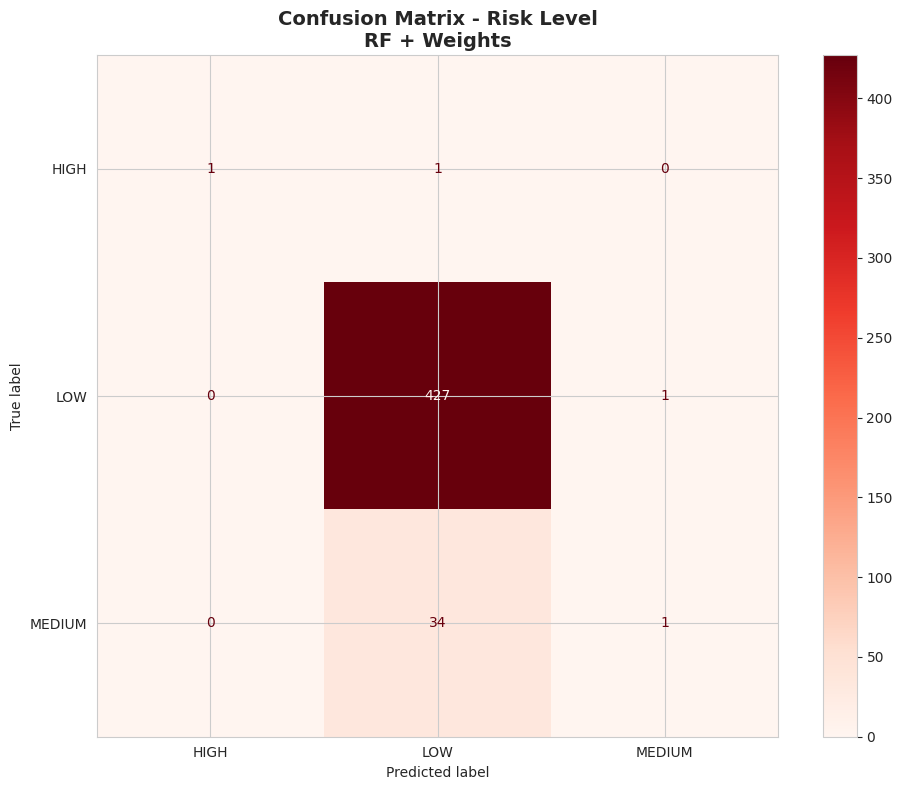


Confusion matrix saved as '06_risk_confusion_matrix.png'


In [60]:
# Risk Model Evaluation

print("RISK LEVEL MODEL EVALUATION")
print("="*80)
print(f"Model: {best_risk_name}")
print("="*80)

# Classification Report
print("\nClassification Report:")
print("-" * 80)
risk_report = classification_report(y_risk_test, best_risk_pred,
                                    target_names=le_risk.classes_,
                                    zero_division=0)
print(risk_report)

# Calculate detailed metrics
acc_risk = accuracy_score(y_risk_test, best_risk_pred)
prec_risk = precision_score(y_risk_test, best_risk_pred, average='weighted', zero_division=0)
rec_risk = recall_score(y_risk_test, best_risk_pred, average='weighted', zero_division=0)
f1_risk = f1_score(y_risk_test, best_risk_pred, average='weighted', zero_division=0)

print("\nOverall Metrics:")
print("-" * 80)
print(f"Accuracy:  {acc_risk:.4f} ({acc_risk*100:.2f}%)")
print(f"Precision (weighted): {prec_risk:.4f}")
print(f"Recall (weighted):    {rec_risk:.4f}")
print(f"F1-Score (weighted):  {f1_risk:.4f}")

# Per-class metrics
print("\nPer-Class Metrics:")
print("-" * 80)
# Use the classification report of the best risk model to get per-class metrics
# 'report_weighted' is the report for the best model ('RF + Weights')
report_dict_risk = classification_report(y_risk_test, best_risk_pred,
                                        target_names=le_risk.classes_,
                                        output_dict=True, zero_division=0)

for cls_name in le_risk.classes_:
    if cls_name in report_dict_risk:
        cls_metrics = report_dict_risk[cls_name]
        print(f"{cls_name}:")
        print(f"  Precision: {cls_metrics['precision']:.4f}")
        print(f"  Recall:    {cls_metrics['recall']:.4f}")
        print(f"  F1-Score:  {cls_metrics['f1-score']:.4f}")

# Confusion Matrix Visualization
fig, ax = plt.subplots(figsize=(10, 8))
cm_risk = confusion_matrix(y_risk_test, best_risk_pred)
disp_risk = ConfusionMatrixDisplay(confusion_matrix=cm_risk,
                                    display_labels=le_risk.classes_)
disp_risk.plot(ax=ax, cmap='Reds', values_format='d')
ax.set_title(f'Confusion Matrix - Risk Level\n{best_risk_name}',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/UmutiSafe/outputs/figures/06_risk_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nConfusion matrix saved as '06_risk_confusion_matrix.png'")

In [61]:
# Cross-Validation
"""
Performed k-fold cross-validation for robust performance estimation.
"""

print("CROSS-VALIDATION (5-FOLD)")
print("="*80)

# Category model cross-validation
print("\n1. Disposal Category Classification:")
print("-" * 80)
cv_scores_cat = cross_val_score(best_category_model, X, y_category_encoded,
                                cv=5, scoring='accuracy', n_jobs=1) # Changed n_jobs to 1
print(f"Fold Accuracies: {[f'{s:.4f}' for s in cv_scores_cat]}")
print(f"Mean Accuracy: {cv_scores_cat.mean():.4f} ± {cv_scores_cat.std():.4f}")
print(f"95% Confidence Interval: [{cv_scores_cat.mean() - 1.96*cv_scores_cat.std():.4f}, "
      f"{cv_scores_cat.mean() + 1.96*cv_scores_cat.std():.4f}]")

# Risk model cross-validation (on balanced data)
print("\n2. Risk Level Classification:")
print("-" * 80)
cv_scores_risk = cross_val_score(best_risk_model, X_train_balanced, y_risk_train_balanced,
                                 cv=5, scoring='f1_macro', n_jobs=1) # Changed n_jobs to 1
print(f"Fold F1-Scores: {[f'{s:.4f}' for s in cv_scores_risk]}")
print(f"Mean F1-Score: {cv_scores_risk.mean():.4f} ± {cv_scores_risk.std():.4f}")
print(f"95% Confidence Interval: [{cv_scores_risk.mean() - 1.96*cv_scores_risk.std():.4f}, "
      f"{cv_scores_risk.mean() + 1.96*cv_scores_risk.std():.4f}]")

CROSS-VALIDATION (5-FOLD)

1. Disposal Category Classification:
--------------------------------------------------------------------------------
Fold Accuracies: ['0.9677', '0.9699', '0.9849', '0.9828', '0.9828']
Mean Accuracy: 0.9776 ± 0.0073
95% Confidence Interval: [0.9634, 0.9918]

2. Risk Level Classification:
--------------------------------------------------------------------------------
Fold F1-Scores: ['0.9271', '0.9923', '0.9922', '0.9903', '0.9922']
Mean F1-Score: 0.9788 ± 0.0259
95% Confidence Interval: [0.9282, 1.0295]


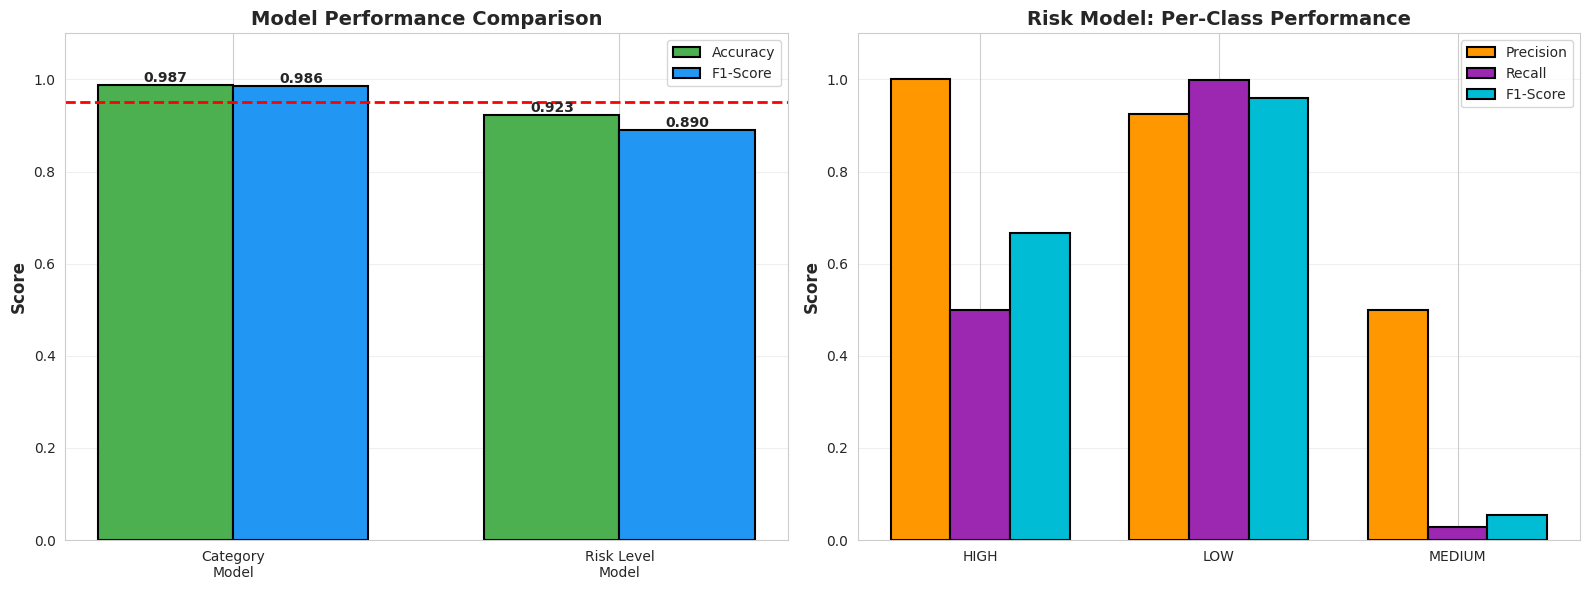

Performance comparison visualization saved as '07_model_performance_comparison.png'


In [62]:
# Cell 12.4: Performance Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Model Performance Comparison
models = ['Category\nModel', 'Risk Level\nModel']
accuracies = [acc_cat, acc_risk]
f1_scores = [f1_cat, f1_risk]

x = np.arange(len(models))
width = 0.35

bars1 = axes[0].bar(x - width/2, accuracies, width, label='Accuracy',
                     color='#4CAF50', edgecolor='black', linewidth=1.5)
bars2 = axes[0].bar(x + width/2, f1_scores, width, label='F1-Score',
                     color='#2196F3', edgecolor='black', linewidth=1.5)

axes[0].set_ylabel('Score', fontweight='bold', fontsize=12)
axes[0].set_title('Model Performance Comparison', fontweight='bold', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].set_ylim([0, 1.1])
axes[0].axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% Target')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Per-Class Performance (Risk Model)
risk_classes = le_risk.classes_
risk_report_dict = classification_report(y_risk_test, best_risk_pred,
                                         target_names=risk_classes,
                                         output_dict=True, zero_division=0)

precisions = [risk_report_dict[cls]['precision'] for cls in risk_classes]
recalls = [risk_report_dict[cls]['recall'] for cls in risk_classes]
f1s = [risk_report_dict[cls]['f1-score'] for cls in risk_classes]

x2 = np.arange(len(risk_classes))
width2 = 0.25

axes[1].bar(x2 - width2, precisions, width2, label='Precision',
            color='#FF9800', edgecolor='black', linewidth=1.5)
axes[1].bar(x2, recalls, width2, label='Recall',
            color='#9C27B0', edgecolor='black', linewidth=1.5)
axes[1].bar(x2 + width2, f1s, width2, label='F1-Score',
            color='#00BCD4', edgecolor='black', linewidth=1.5)

axes[1].set_ylabel('Score', fontweight='bold', fontsize=12)
axes[1].set_title('Risk Model: Per-Class Performance', fontweight='bold', fontsize=14)
axes[1].set_xticks(x2)
axes[1].set_xticklabels(risk_classes)
axes[1].legend()
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/UmutiSafe/outputs/figures/07_model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Performance comparison visualization saved as '07_model_performance_comparison.png'")

# SECTION 13: FEATURE IMPORTANCE ANALYSIS
 Analyzed and visualized feature importance
- Extract feature importance from tree-based models
- Identify most influential features
- Visualize top features

FEATURE IMPORTANCE ANALYSIS

Category Model Feature Importance:
--------------------------------------------------------------------------------

Top 20 Most Important Features:
  1. tablets: 0.124436
  2. solution: 0.079400
  3. glass: 0.049095
  4. pvc: 0.044847
  5. blister: 0.040457
  6. tube: 0.040158
  7. powder: 0.035445
  8. bottle: 0.031524
  9. amber: 0.029142
  10. cream: 0.029061
  11. powder for: 0.028668
  12. alu: 0.026774
  13. solution for: 0.026309
  14. injection: 0.024973
  15. ml: 0.023851
  16. syrup: 0.020562
  17. suspension: 0.019623
  18. ldpe: 0.016543
  19. for: 0.016219
  20. pet: 0.014280


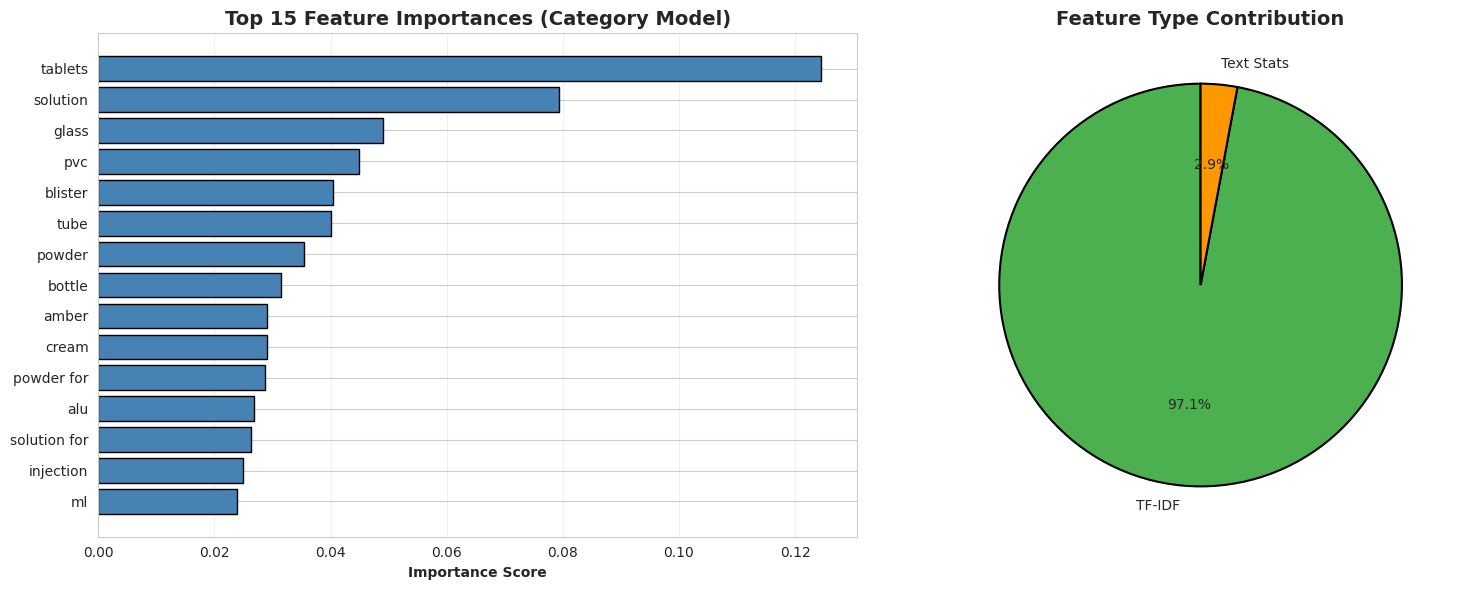


Feature importance visualization saved as '08_feature_importance.png'


In [63]:
# Feature Importance Analysis

print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Check if best category model has feature importance
if hasattr(best_category_model, 'feature_importances_'):
    print("\nCategory Model Feature Importance:")
    print("-" * 80)

    # Create feature names (combination of TF-IDF, Word2Vec, and text features)
    feature_names_list = (list(tfidf.get_feature_names_out()) +
                         # [f'w2v_{i}' for i in range(50)] + # Removed due to Word2Vec skip
                         ['word_count', 'char_count', 'special_chars'])

    # Get feature importance
    importances = best_category_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': [feature_names_list[i] for i in indices],
        'Importance': importances[indices]
    })

    # Top 20 features
    print("\nTop 20 Most Important Features:")
    print(feature_importance_df.head(20).to_string(index=False))

    # Save feature importance DataFrame to Google Drive
    output_path = '/content/drive/MyDrive/UmutiSafe/outputs/results/feature_importance.csv'
    try:
        feature_importance_df.to_csv(output_path, index=False)
        print(f"\nFeature importance data saved to: {output_path}")
    except Exception as e:
        print(f"\nError saving feature importance data: {e}")


    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Top 15 features
    top_n = 15
    top_indices = indices[:top_n]
    top_features = [feature_names_list[i] for i in top_indices]
    top_importances = importances[top_indices]

    axes[0].barh(range(len(top_features)), top_importances, color='steelblue', edgecolor='black')
    axes[0].set_yticks(range(len(top_features)))
    axes[0].set_yticklabels(top_features)
    axes[0].set_xlabel('Importance Score', fontweight='bold')
    axes[0].set_title('Top 15 Feature Importances (Category Model)', fontweight='bold', fontsize=14)
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)

    # Plot 2: Feature type distribution
    # Need to adjust indices based on removed Word2Vec features
    tfidf_importance = np.sum(importances[:len(tfidf.get_feature_names_out())])
    # w2v_importance = np.sum(importances[len(tfidf.get_feature_names_out()):len(tfidf.get_feature_names_out())+50]) # Removed
    text_importance = np.sum(importances[-3:])

    feature_types = ['TF-IDF', 'Text Stats'] # Removed Word2Vec from labels
    type_importances = [tfidf_importance, text_importance] # Removed Word2Vec from values
    colors_types = ['#4CAF50', '#FF9800'] # Adjusted colors

    axes[1].pie(type_importances, labels=feature_types, autopct='%1.1f%%',
                colors=colors_types, startangle=90,
                wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
    axes[1].set_title('Feature Type Contribution', fontweight='bold', fontsize=14)

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/UmutiSafe/outputs/figures/08_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nFeature importance visualization saved as '08_feature_importance.png'")
else:
    print("\nSelected model does not provide feature importance (Neural Network)")

# SECTION 14: DISPOSAL GUIDELINES DATABASE
Comprehensive disposal guidelines for each category:
- Step-by-step procedures
- Safety precautions
- Prohibitions
- Special handling instructions

In [64]:
# Disposal Guidelines Database
"""
Defined comprehensive disposal guidelines for all categories.
Based on WHO guidelines and Rwanda FDA regulations.
"""

disposal_guidelines = {
    1: {  # Solids
        'category_name': 'Solids (Tablets, Capsules, Powders)',
        'steps': [
            {
                'step': 1,
                'title': 'Preparation and Sorting',
                'actions': [
                    'Wear appropriate Personal Protective Equipment (PPE): gloves, mask, and protective gown',
                    'Sort expired or unused tablets separately from regular waste',
                    'Check expiry dates and verify medicine names',
                    'Document the quantity and type of medicine being disposed',
                    'Keep a disposal log with date, medicine name, quantity, and reason for disposal'
                ]
            },
            {
                'step': 2,
                'title': 'Packaging Removal',
                'actions': [
                    'Remove medicines from outer cardboard or paper packaging',
                    'Keep medicines in their original blister packs or inner packaging',
                    'Do NOT remove individual tablets from blister packs',
                    'Separate packaging materials for recycling if possible',
                    'Ensure labels remain legible for identification'
                ]
            },
            {
                'step': 3,
                'title': 'Container Preparation',
                'actions': [
                    'Use clean plastic drums (HDPE) or steel drums with secure lids',
                    'Label drums clearly: "PHARMACEUTICAL WASTE - SOLIDS"',
                    'Add date of collection on the label',
                    'If handling large quantities of one drug, mix with other medicines',
                    'Fill containers to maximum 75% capacity for safe handling'
                ]
            },
            {
                'step': 4,
                'title': 'Disposal Method Selection',
                'options': [
                    'Encapsulation: Mix with cement/lime in 55-gallon drums (preferred for small-medium quantities)',
                    'Inertization: Mix with water, cement, lime, and sawdust (for medium quantities)',
                    'High-temperature incineration: >1000°C (for large quantities or high-risk drugs)',
                    'Secure landfill: Only for properly encapsulated waste in designated areas'
                ]
            },
            {
                'step': 5,
                'title': 'Transport and Documentation',
                'actions': [
                    'Seal drums securely before transport',
                    'Complete waste transfer documentation',
                    'Use authorized transporters with permits',
                    'Transport to Rwanda FDA-authorized disposal facility',
                    'Keep records for minimum 3 years',
                    'Obtain disposal certificate from facility'
                ]
            }
        ],
        'prohibitions': [
            'Do NOT flush tablets down toilet or sink (unless specifically listed in FDA flush list)',
            'Do NOT burn in open air or low-temperature incinerators',
            'Do NOT dispose in regular household waste without encapsulation',
            'Do NOT mix with infectious or sharp waste',
            'Do NOT crush or pulverize high-risk drugs without proper containment',
            'Do NOT dispose in water bodies or drainage systems'
        ],
        'safety': [
            'Always wear appropriate PPE (gloves, mask, goggles)',
            'Work in well-ventilated areas',
            'Wash hands thoroughly with soap after handling',
            'Keep medicines away from children during disposal process',
            'Have spill kit readily available',
            'Clean work surfaces with disinfectant after disposal activities',
            'Report any accidental exposure immediately'
        ]
    },
    2: {  # Liquids
        'category_name': 'Liquids (Solutions, Injections, Syrups)',
        'steps': [
            {
                'step': 1,
                'title': 'Initial Assessment and Classification',
                'actions': [
                    'Identify if liquid is biodegradable or non-biodegradable',
                    'Check if sewage treatment plant is available and authorized',
                    'Verify medicine risk level (HIGH/MEDIUM/LOW)',
                    'Wear appropriate PPE: chemical-resistant gloves, goggles, face shield, gown',
                    'Document quantity in liters or milliliters',
                    'Check container integrity for leaks or damage'
                ]
            },
            {
                'step': 2,
                'title': 'Segregation by Risk Level',
                'actions': [
                    'BIODEGRADABLE: vitamins, glucose, saline, amino acids (segregate for dilution disposal)',
                    'NON-BIODEGRADABLE: antibiotics, antineoplastics (segregate for incineration)',
                    'HIGH-RISK: antineoplastics, cytotoxic drugs (keep completely separate)',
                    'Check for compatibility issues before mixing',
                    'Use clearly labeled containers for each category'
                ]
            },
            {
                'step': 3,
                'title': 'Disposal Method Selection',
                'options': [
                    'Sewer disposal: ONLY for biodegradable liquids with sewage treatment (dilute 1:10 minimum)',
                    'Pit disposal: Dig pit 1.5m deep, line with clay, dispose and cover with soil (if no sewer)',
                    'Chemical treatment: Neutralize acids/bases, precipitate heavy metals before disposal',
                    'High-temperature incineration: >1200°C for non-biodegradable and high-risk liquids',
                    'Return to supplier: For large quantities of controlled substances'
                ]
            },
            {
                'step': 4,
                'title': 'Safe Disposal Execution',
                'actions': [
                    'For sewer disposal: Dilute with at least 10 parts water',
                    'Pour slowly to avoid splashing and aerosol formation',
                    'Flush with additional water after disposal',
                    'Rinse empty containers three times with water',
                    'Crush containers after rinsing to prevent reuse',
                    'Ensure adequate ventilation during entire process'
                ]
            },
            {
                'step': 5,
                'title': 'Documentation and Monitoring',
                'actions': [
                    'Record type, quantity, and disposal method used',
                    'Document date, time, and personnel involved',
                    'Obtain disposal certificates for incinerated waste',
                    'Monitor disposal site for environmental impact',
                    'Keep records for minimum 3 years',
                    'Report any spills or accidents immediately'
                ]
            }
        ],
        'prohibitions': [
            'NEVER dispose antineoplastic drugs in sewer systems',
            'NEVER dispose antibiotics in sewer (contributes to antimicrobial resistance)',
            'Do NOT pour concentrated medicines directly into sewers',
            'Do NOT reuse medicine containers for other purposes',
            'Do NOT mix incompatible chemicals (acids with bases, oxidizers with reducers)',
            'Do NOT dispose in storm drains or natural water bodies',
            'Do NOT incinerate in low-temperature incinerators (<800°C)'
        ],
        'safety': [
            'Prevent splashing during dilution and disposal',
            'Ensure adequate ventilation (outdoor or fume hood)',
            'Have chemical spill kit readily available',
            'Clean spills immediately with absorbent material',
            'Neutralize spills if possible before cleanup',
            'Dispose of cleanup materials as hazardous waste',
            'Provide eyewash station and safety shower nearby',
            'Never work alone when handling high-risk liquids'
        ]
    },
    3: {  # Semisolids
        'category_name': 'Semisolids (Creams, Ointments, Gels)',
        'steps': [
            {
                'step': 1,
                'title': 'Preparation',
                'actions': [
                    'Wear PPE: gloves and protective gown',
                    'Collect expired/unused semisolid medicines',
                    'Keep in original containers where possible'
                ]
            },
            {
                'step': 2,
                'title': 'Containment',
                'actions': [
                    'Place in sealed plastic bags or containers',
                    'Label as "PHARMACEUTICAL WASTE - SEMISOLIDS"',
                    'Do not empty tubes completely (to maintain identification)'
                ]
            },
            {
                'step': 3,
                'title': 'Disposal',
                'options': [
                    'Incineration: High-temperature (>1000°C) preferred',
                    'Landfill: Only in secure pharmaceutical waste section',
                    'Encapsulation: Mix with cement for small quantities'
                ]
            }
        ],
        'prohibitions': [
            'Do NOT flush down toilet or sink',
            'Do NOT dispose in regular trash',
            'Do NOT burn in open air'
        ],
        'safety': [
            'Wear gloves to prevent skin contact',
            'Wash hands after handling',
            'Avoid contact with eyes'
        ]
    },
    4: {  # Aerosols
        'category_name': 'Aerosols and Inhalers',
        'steps': [
            {
                'step': 1,
                'title': 'Special Handling',
                'actions': [
                    'Do NOT puncture or incinerate pressurized containers',
                    'Keep in original packaging',
                    'Ensure containers are not damaged'
                ]
            },
            {
                'step': 2,
                'title': 'Depressurization',
                'actions': [
                    'Release pressure in controlled manner if possible',
                    'Work in well-ventilated area',
                    'Follow manufacturer instructions for disposal'
                ]
            },
            {
                'step': 3,
                'title': 'Disposal',
                'options': [
                    'Return to pharmacy or manufacturer program',
                    'Specialized waste facility for pressurized containers',
                    'Hazardous waste collection program'
                ]
            }
        ],
        'prohibitions': [
            'NEVER puncture pressurized containers',
            'Do NOT incinerate',
            'Do NOT expose to heat or flames',
            'Do NOT crush'
        ],
        'safety': [
            'Handle with extreme care',
            'Store in cool, dry place until disposal',
            'Keep away from heat sources',
            'Use safety goggles when handling damaged containers'
        ]
    },
    5: {  # Biological
        'category_name': 'Biological Waste (Vaccines, Blood Products)',
        'steps': [
            {
                'step': 1,
                'title': 'Biohazard Protocol',
                'actions': [
                    'Treat as potentially infectious material',
                    'Wear full PPE including face shield',
                    'Use puncture-resistant containers',
                    'Label with biohazard symbol'
                ]
            },
            {
                'step': 2,
                'title': 'Containment',
                'actions': [
                    'Place in red biohazard bags',
                    'Seal containers securely',
                    'Store in designated biohazard area',
                    'Maintain cold chain if required'
                ]
            },
            {
                'step': 3,
                'title': 'Disposal',
                'options': [
                    'High-temperature incineration: >1200°C (required)',
                    'Autoclave before disposal (if applicable)',
                    'Specialized biomedical waste facility'
                ]
            }
        ],
        'prohibitions': [
            'NEVER dispose in regular waste',
            'Do NOT pour down drains',
            'Do NOT attempt home disposal',
            'Do NOT open containers'
        ],
        'safety': [
            'Treat as infectious waste',
            'Report exposures immediately',
            'Follow infection control protocols',
            'Vaccinate handlers if appropriate'
        ]
    }
}

print("Disposal guidelines database created successfully.")
print(f"Total categories: {len(disposal_guidelines)}")
for cat_id, guidelines in disposal_guidelines.items():
    print(f"  Category {cat_id}: {guidelines['category_name']}")

Disposal guidelines database created successfully.
Total categories: 5
  Category 1: Solids (Tablets, Capsules, Powders)
  Category 2: Liquids (Solutions, Injections, Syrups)
  Category 3: Semisolids (Creams, Ointments, Gels)
  Category 4: Aerosols and Inhalers
  Category 5: Biological Waste (Vaccines, Blood Products)


# SECTION 15: OCR INTEGRATION FOR MEDICINE LABEL RECOGNITION
Implemented OCR system for automatic medicine identification:
- Initialize EasyOCR readers
- Image preprocessing
- Text extraction
- Medicine information parsing
- Database matching

In [65]:
# : Initialize OCR Engines
"""
Initializing EasyOCR readers for English and French (Rwanda's official languages).
"""

print("OCR SYSTEM INITIALIZATION")
print("="*80)

# Initialize EasyOCR reader for English and French
print("Loading EasyOCR models...")
reader = easyocr.Reader(['en', 'fr'], gpu=False)  # Set gpu=True if GPU available
print("EasyOCR models loaded successfully")
# print(f"Supported languages: {reader.get_supported_lang()}") # Removed due to AttributeError

OCR SYSTEM INITIALIZATION
Loading EasyOCR models...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteEasyOCR models loaded successfully


In [66]:
# Image Preprocessing Functions for optimal OCR accuracy

def preprocess_image(image_path, method='advanced'):
    """
    Advanced image preprocessing pipeline for medicine labels.

    Pipeline stages:
    1. Grayscale conversion
    2. Deskewing (rotation correction)
    3. Denoising (Gaussian blur)
    4. Contrast enhancement (CLAHE)
    5. Morphological operations (erode/dilate)
    6. Binarization (adaptive thresholding)
    7. Upscaling (2x resolution increase)

    Args:
        image_path (str): Path to image file
        method (str): 'basic' or 'advanced' preprocessing

    Returns:
        np.array: Preprocessed grayscale image
    """
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image: {image_path}")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if method == 'advanced':
        # Deskew: Detect and correct rotation
        coords = np.column_stack(np.where(gray > 0))
        angle = cv2.minAreaRect(coords)[-1]
        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle

        # Apply rotation
        (h, w) = gray.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        gray = cv2.warpAffine(gray, M, (w, h),
                              flags=cv2.INTER_CUBIC,
                              borderMode=cv2.BORDER_REPLICATE)

        # Denoise: Gaussian blur
        gray = cv2.GaussianBlur(gray, (3, 3), 0)

        # Contrast Enhancement: CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        gray = clahe.apply(gray)

        # Morphological Operations
        kernel = np.ones((2, 2), np.uint8)
        gray = cv2.erode(gray, kernel, iterations=1)
        gray = cv2.dilate(gray, kernel, iterations=1)

        # Binarization: Adaptive thresholding
        gray = cv2.adaptiveThreshold(gray, 255,
                                     cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

        # Upscale: 2x resolution
        height, width = gray.shape
        gray = cv2.resize(gray, (width * 2, height * 2),
                         interpolation=cv2.INTER_CUBIC)

    elif method == 'basic':
        # Basic preprocessing
        _, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        height, width = gray.shape
        gray = cv2.resize(gray, (width * 2, height * 2),
                         interpolation=cv2.INTER_CUBIC)

    return gray

print("Image preprocessing functions defined successfully.")

Image preprocessing functions defined successfully.


In [67]:
# OCR Text Extraction
"""
Extract text from medicine labels using EasyOCR.
"""

def extract_text_from_image(image_path, use_preprocessing=True, confidence_threshold=0.3):
    """
    Extract text from medicine package image using OCR.

    Args:
        image_path (str): Path to medicine image
        use_preprocessing (bool): Apply preprocessing pipeline
        confidence_threshold (float): Minimum confidence for text detection

    Returns:
        dict: OCR results with text, confidence scores, and metadata
    """
    print(f"Processing image: {image_path}")

    # Preprocess image
    if use_preprocessing:
        processed_image = preprocess_image(image_path, method='advanced')
        temp_path = 'temp_preprocessed.jpg'
        cv2.imwrite(temp_path, processed_image)
        ocr_image_path = temp_path
    else:
        ocr_image_path = image_path

    # Perform OCR
    results = reader.readtext(ocr_image_path, detail=1)

    # Extract and filter results
    extracted_texts = []
    confidences = []

    for bbox, text, confidence in results:
        if confidence >= confidence_threshold:
            extracted_texts.append(text)
            confidences.append(confidence)

    # Combine all text
    full_text = ' '.join(extracted_texts)
    avg_confidence = np.mean(confidences) if confidences else 0.0

    return {
        'full_text': full_text,
        'text_blocks': extracted_texts,
        'confidences': confidences,
        'avg_confidence': avg_confidence,
        'num_detections': len(extracted_texts)
    }

print("OCR text extraction function defined successfully.")

OCR text extraction function defined successfully.


In [68]:
# Medicine Information Parser to extract structured medicine information.

def parse_medicine_info(ocr_text):
    """
    Parse OCR text to extract medicine information.

    Extracts:
    - Brand name
    - Generic name (active ingredients)
    - Dosage form
    - Strength
    - Packaging information

    Args:
        ocr_text (str): Raw text from OCR

    Returns:
        dict: Parsed medicine information
    """
    text = ocr_text.upper().strip()

    result = {
        'brand_name': None,
        'generic_name': None,
        'dosage_form': None,
        'strength': None,
        'packaging': None
    }

    # Define dosage form keywords
    dosage_forms = {
        'TABLETS': ['TABLET', 'TAB', 'TABS'],
        'CAPSULES': ['CAPSULE', 'CAP', 'CAPS'],
        'SOLUTION': ['SOLUTION', 'SOL', 'INJECTION', 'INJ'],
        'SYRUP': ['SYRUP', 'SYR'],
        'CREAM': ['CREAM', 'OINTMENT', 'GEL'],
        'SUSPENSION': ['SUSPENSION', 'SUSP'],
        'POWDER': ['POWDER', 'PWD']
    }

    # Extract dosage form
    for standard_form, keywords in dosage_forms.items():
        for keyword in keywords:
            if keyword in text:
                result['dosage_form'] = standard_form
                break
        if result['dosage_form']:
            break

    # Extract strength using regex
    strength_patterns = [
        r'(\d+\.?\d*)\s*(MG|G|ML|MCG|%)',
        r'(\d+\.?\d*)\s*(MG/ML|G/ML|MCG/ML)'
    ]

    for pattern in strength_patterns:
        match = re.search(pattern, text)
        if match:
            result['strength'] = match.group(0)
            break

    # Extract brand name (first 1-3 words)
    words = text.split()
    if len(words) > 0:
        result['brand_name'] = ' '.join(words[:min(3, len(words))])

    # Extract generic name (look for ingredient indicators)
    generic_indicators = ['CONTAINS', 'ACTIVE', 'INGREDIENT', 'COMPOSITION']
    for indicator in generic_indicators:
        if indicator in text:
            idx = text.index(indicator)
            remaining = text[idx:].split()
            if len(remaining) > 1:
                result['generic_name'] = ' '.join(remaining[1:min(6, len(remaining))])
                break

    return result

print("Medicine information parser defined successfully.")

Medicine information parser defined successfully.


In [69]:
# S Database Matching with OCR-extracted information  using fuzzy matching.

def smart_medicine_matcher(ocr_info, database_df, threshold=0.6):
    """
    Match OCR-extracted medicine information with database.

    Uses fuzzy string matching to find best matches even with OCR errors.

    Args:
        ocr_info (dict): Parsed medicine information from OCR
        database_df (pd.DataFrame): Medicine database
        threshold (float): Minimum similarity score (0-1)

    Returns:
        list: Matched medicines sorted by confidence score
    """
    matches = []

    for idx, row in database_df.iterrows():
        score = 0.0
        match_details = {}

        # Compare brand name (50% weight)
        if ocr_info['brand_name']:
            brand_sim = SequenceMatcher(None,
                                       ocr_info['brand_name'].upper(),
                                       str(row['Brand_Name']).upper()).ratio()
            score += brand_sim * 0.5
            match_details['brand_similarity'] = brand_sim

        # Compare dosage form (30% weight)
        if ocr_info['dosage_form']:
            form_sim = SequenceMatcher(None,
                                      ocr_info['dosage_form'].upper(),
                                      str(row['Dosage_Form']).upper()).ratio()
            score += form_sim * 0.3
            match_details['form_similarity'] = form_sim

        # Compare strength (20% weight)
        if ocr_info['strength'] and 'Dosage_Strength' in row:
            strength_sim = SequenceMatcher(None,
                                          ocr_info['strength'].upper(),
                                          str(row['Dosage_Strength']).upper()).ratio()
            score += strength_sim * 0.2
            match_details['strength_similarity'] = strength_sim

        # Add to matches if above threshold
        if score >= threshold:
            matches.append({
                'database_index': idx,
                'medicine': row,
                'total_score': score,
                'details': match_details
            })

    # Sort by score
    matches = sorted(matches, key=lambda x: x['total_score'], reverse=True)

    return matches

print("Smart medicine matcher defined successfully.")

Smart medicine matcher defined successfully.


# SECTION 16: PRODUCTION-READY PREDICTOR CLASS
Creating  predictor class
- Unified interface for predictions
- Support for text and image inputs
- JSON output for API integration
- Comprehensive guidelines generation

In [70]:
# Medicine Disposal Predictor Class with multiple input methods (text/image)

class MedicineDisposalPredictor:
    """
    Production-ready predictor for medicine disposal classification.

    Features:
    - Text-based prediction
    - Image-based prediction (OCR)
    - JSON output format
    - Comprehensive disposal guidelines
    """

    def __init__(self, category_model, risk_model, tfidf,
                 label_encoders, guidelines):
        """
        Initialize predictor with trained models and components.

        Args:
            category_model: Trained disposal category classifier
            risk_model: Trained risk level classifier
            tfidf: Fitted TF-IDF vectorizer
            label_encoders: Dictionary with label encoders
            guidelines: Disposal guidelines database
        """
        self.category_model = category_model
        self.risk_model = risk_model
        self.tfidf = tfidf
        # self.w2v_model = w2v_model # Removed due to compatibility issues
        self.le_category = label_encoders['category']
        self.le_risk = label_encoders['risk']
        self.guidelines = guidelines

    def _prepare_features(self, product_name, ingredients, dosage_form, packaging):
        """
        Prepare feature vector for prediction.

        Args:
            product_name (str): Medicine brand name
            ingredients (str): Active ingredients
            dosage_form (str): Dosage form
            packaging (str): Packaging type

        Returns:
            np.array: Feature vector
        """
        # Combine text
        combined_text = f"{product_name} {ingredients} {dosage_form} {packaging}"

        # TF-IDF features
        text_tfidf = self.tfidf.transform([combined_text])

        # Word2Vec features (Skipped due to compatibility issues)
        # tokenized = combined_text.lower().split()
        # doc_vec = self._document_vector(tokenized)
        # text_w2v = np.array([doc_vec])

        # Text statistics
        word_count = len(combined_text.split())
        char_count = len(combined_text)
        special_chars = len(re.findall(r'[^a-zA-Z0-9\s]', combined_text))
        numerical = np.array([[word_count, char_count, special_chars]])

        # Combine all features (excluding Word2Vec)
        # features = np.hstack((text_tfidf.toarray(), text_w2v, numerical)) # Original with Word2Vec
        features = np.hstack((text_tfidf.toarray(), numerical)) # Modified to exclude Word2Vec


        return features

    def _document_vector(self, doc):
        """Convert document to vector using Word2Vec."""
        # This method is no longer used as Word2Vec is skipped
        # doc = [word for word in doc if word in self.w2v_model.wv.key_to_index]
        # if len(doc) == 0:
        #     return np.zeros(self.w2v_model.wv.vector_size)
        # return np.mean([self.w2v_model.wv[word] for word in doc], axis=0)
        pass # Keep a placeholder or remove if not needed elsewhere

    def predict(self, product_name, ingredients, dosage_form, packaging):
        """
        Predict disposal category and risk level for a medicine.

        Args:
            product_name (str): Medicine brand name
            ingredients (str): Active ingredients
            dosage_form (str): Dosage form
            packaging (str): Packaging type

        Returns:
            dict: Classification results with guidelines
        """
        # Prepare features
        features = self._prepare_features(product_name, ingredients,
                                         dosage_form, packaging)

        # Predict
        category_pred = self.category_model.predict(features)[0]
        risk_pred = self.risk_model.predict(features)[0]

        # Decode predictions
        # Ensure category_pred is an integer before inverse_transform
        category_name = self.le_category.inverse_transform([int(category_pred)])[0]
        risk_name = self.le_risk.inverse_transform([int(risk_pred)])[0]


        # Get guidelines
        # Note: Disposal categories are 1-5, but encoded labels might be 0-4.
        # Use the original numerical category for guideline lookup.
        original_category = classify_dosage_form(dosage_form)
        guidelines = self.guidelines.get(original_category, {})


        # Check biodegradability
        is_biodegradable = check_biodegradable(ingredients)

        # Prepare result
        result = {
            'medicine_info': {
                'product_name': product_name,
                'ingredients': ingredients,
                'dosage_form': dosage_form,
                'packaging': packaging
            },
            'classification': {
                'disposal_category': int(original_category),
                'category_name': guidelines.get('category_name', 'Unknown'),
                'risk_level': risk_name,
                'is_biodegradable': is_biodegradable
            },
            'guidelines': guidelines
        }

        return result

    def predict_from_image(self, image_path, database_df):
        """
        Predict from medicine package image using OCR.

        Args:
            image_path (str): Path to medicine image
            database_df (pd.DataFrame): Medicine database

        Returns:
            dict: Classification results with OCR metadata
        """
        # Extract text from image
        ocr_result = extract_text_from_image(image_path, use_preprocessing=True)

        # Parse medicine information
        parsed_info = parse_medicine_info(ocr_result['full_text'])

        # Match with database
        matches = smart_medicine_matcher(parsed_info, database_df, threshold=0.6)

        if not matches:
            return {
                'status': 'error',
                'message': 'No matching medicine found in database',
                'ocr_confidence': ocr_result['avg_confidence'],
                'extracted_text': ocr_result['full_text']
            }

        # Use best match
        best_match = matches[0]['medicine']

        # Predict using matched medicine
        result = self.predict(
            product_name=best_match['Brand_Name'],
            ingredients=best_match['Generic_Name'],
            dosage_form=best_match['Dosage_Form'],
            packaging=best_match['Packaging_Type']
        )

        # Add OCR metadata
        result['ocr_info'] = {
            'confidence': ocr_result['avg_confidence'],
            'match_score': matches[0]['total_score'],
            'extracted_text': ocr_result['full_text']
        }

        return result

    def print_guidelines(self, result):
        """
        Print formatted disposal guidelines.

        Args:
            result (dict): Prediction result
        """
        print("\n" + "="*80)
        print("PHARMACEUTICAL WASTE DISPOSAL GUIDELINES")
        print("="*80)

        # Medicine Information
        info = result['medicine_info']
        print(f"\nMedicine: {info['product_name']}")
        print(f"Ingredients: {info['ingredients']}")
        print(f"Dosage Form: {info['dosage_form']}")

        # Classification
        classification = result['classification']
        print(f"\nDisposal Category: {classification['disposal_category']} - {classification['category_name']}")
        print(f"Risk Level: {classification['risk_level']}")
        print(f"Biodegradable: {'Yes' if classification['is_biodegradable'] else 'No'}")

        # Guidelines
        guidelines = result['guidelines']

        if 'steps' in guidelines:
            print("\n" + "="*80)
            print("STEP-BY-STEP DISPOSAL PROCEDURE")
            print("="*80)

            for step in guidelines['steps']:
                print(f"\nSTEP {step['step']}: {step['title']}")
                print("-" * 80)

                if 'actions' in step:
                    for action in step['actions']:
                        print(f"  - {action}")

                if 'options' in step:
                    print("  Options:")
                    for option in step['options']:
                        print(f"    * {option}")

        # Prohibitions
        if 'prohibitions' in guidelines:
            print("PROHIBITIONS")
            print("="*80)
            for prohibition in guidelines['prohibitions']:
                print(f"  X {prohibition}")

        # Safety
        if 'safety' in guidelines:
            print("SAFETY PRECAUTIONS")
            print("="*80)
            for safety in guidelines['safety']:
                print(f"  ! {safety}")

        print("\n" + "="*80)

    def to_json(self, result):
        """Convert result to JSON format for API integration."""
        return json.dumps(result, indent=2)

# Create predictor instance
label_encoders = {
    'category': le_category,
    'risk': le_risk
}

predictor = MedicineDisposalPredictor(
    category_model=best_category_model,
    risk_model=best_risk_model,
    tfidf=tfidf,
    # w2v_model=w2v_model, # Removed w2v_model
    label_encoders=label_encoders,
    guidelines=disposal_guidelines
)

print("Medicine Disposal Predictor created successfully.")

Medicine Disposal Predictor created successfully.


# SECTION 17: MODEL TESTING AND VALIDATION
Testing the model with example medicines
- Text-based predictions
- Guideline generation
- Performance validation

In [ ]:
# Test with Example Medicines


print("MODEL TESTING WITH EXAMPLE MEDICINES")
print("="*80)

# Define test cases
test_medicines = [
    {
        'name': 'ILET B2',
        'product_name': 'ILET B2',
        'ingredients': 'Glimepiride, Metformin HCl',
        'dosage_form': 'Tablets',
        'packaging': 'ALU-PVC/PVDC BLISTER PACK'
    },
    {
        'name': 'EYLEA',
        'product_name': 'EYLEA',
        'ingredients': 'Aflibercept',
        'dosage_form': 'Solution For Injection',
        'packaging': 'TYPE 1 GLASS VIAL'
    },
    {
        'name': 'FLOXSAFE-400',
        'product_name': 'FLOXSAFE-400',
        'ingredients': 'Moxifloxacin',
        'dosage_form': 'Tablets',
        'packaging': 'PVC/PVDC BLISTER PACK'
    },
    {
        'name': 'PARACETAMOL',
        'product_name': 'PARACETAMOL',
        'ingredients': 'Paracetamol',
        'dosage_form': 'Tablets',
        'packaging': 'BLISTER PACK'
    }
]

# Test each medicine
test_results = []
for med in test_medicines:
    print(f"\nTesting: {med['name']}")
    print("-" * 80)

    result = predictor.predict(
        product_name=med['product_name'],
        ingredients=med['ingredients'],
        dosage_form=med['dosage_form'],
        packaging=med['packaging']
    )

    print(f"Category: {result['classification']['disposal_category']} - {result['classification']['category_name']}")
    print(f"Risk Level: {result['classification']['risk_level']}")
    print(f"Biodegradable: {result['classification']['is_biodegradable']}")

    test_results.append({
        'medicine': med['name'],
        'category': result['classification']['disposal_category'],
        'risk': result['classification']['risk_level']
    })

# Display summary
print("\n" + "="*80)
print("TEST RESULTS SUMMARY")
print("="*80)
test_summary_df = pd.DataFrame(test_results)
display(test_summary_df)

MODEL TESTING WITH EXAMPLE MEDICINES

Testing: ILET B2
--------------------------------------------------------------------------------
Category: 1 - Solids (Tablets, Capsules, Powders)
Risk Level: LOW
Biodegradable: False

Testing: EYLEA
--------------------------------------------------------------------------------
Category: 2 - Liquids (Solutions, Injections, Syrups)
Risk Level: LOW
Biodegradable: False

Testing: FLOXSAFE-400
--------------------------------------------------------------------------------
Category: 1 - Solids (Tablets, Capsules, Powders)
Risk Level: MEDIUM
Biodegradable: False

Testing: PARACETAMOL
--------------------------------------------------------------------------------
Category: 1 - Solids (Tablets, Capsules, Powders)
Risk Level: LOW
Biodegradable: False

TEST RESULTS SUMMARY


,medicine,category,risk
0,ILET B2,1,LOW
1,EYLEA,2,LOW
2,FLOXSAFE-400,1,MEDIUM
3,PARACETAMOL,1,LOW


In [ ]:
# Display Detailed Guidelines

print("DETAILED GUIDELINES EXAMPLE")
print("="*80)

example_result = predictor.predict(
    product_name='FLOXSAFE-400',
    ingredients='Moxifloxacin',
    dosage_form='Tablets',
    packaging='PVC/PVDC BLISTER PACK'
)

predictor.print_guidelines(example_result)

DETAILED GUIDELINES EXAMPLE

PHARMACEUTICAL WASTE DISPOSAL GUIDELINES

Medicine: FLOXSAFE-400
Ingredients: Moxifloxacin
Dosage Form: Tablets

Disposal Category: 1 - Solids (Tablets, Capsules, Powders)
Risk Level: MEDIUM
Biodegradable: No

STEP-BY-STEP DISPOSAL PROCEDURE

STEP 1: Preparation and Sorting
--------------------------------------------------------------------------------
  - Wear appropriate Personal Protective Equipment (PPE): gloves, mask, and protective gown
  - Sort expired or unused tablets separately from regular waste
  - Check expiry dates and verify medicine names
  - Document the quantity and type of medicine being disposed
  - Keep a disposal log with date, medicine name, quantity, and reason for disposal

STEP 2: Packaging Removal
--------------------------------------------------------------------------------
  - Remove medicines from outer cardboard or paper packaging
  - Keep medicines in their original blister packs or inner packaging
  - Do NOT remove indivi

# SECTION 19: FINAL SUMMARY AND EVALUATION REPORT
- Dataset statistics
- Model performance summary
- Key findings


In [71]:
#  Final Evaluation Report
"""
Generate comprehensive project evaluation report.
"""

print("="*80)
print("UMUTISAFE: EVALUATION REPORT")
print("="*80)

report = f"""

PROJECT: UmutiSafe - Intelligent Medicine Disposal Guidance System
AUTHOR: Jules Gatete
African Leadership University
DATE: {datetime.now().strftime('%B %d, %Y')}

{'='*80}
1. PROBLEM STATEMENT
{'='*80}
Over 90% of Rwandan households dispose of medicines improperly, leading to:
- Environmental contamination (water, soil pollution)
- Antimicrobial resistance development
- Accidental poisoning risks
- Public health hazards

{'='*80}
2. SOLUTION APPROACH
{'='*80}
Machine learning-based classification system for automated disposal guidance:
- Multi-model ensemble approach
- Advanced NLP feature engineering (TF-IDF)
- Multi-class classification (5 categories
- Class imbalance handling (SMOTE, class weights)
- OCR integration for medicine label recognition

{'='*80}
3. DATASET STATISTICS
{'='*80}
Total Medicines: {len(df)}
Training Set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)
Testing Set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)

Disposal Category Distribution:
{df['disposal_category'].value_counts().to_string()}

Risk Level Distribution:
{df['risk_level'].value_counts().to_string()}

Hazardous Drugs: {sum(hazard_counts.values())} ({sum(hazard_counts.values())/len(df)*100:.1f}%)

{'='*80}
4. MODEL ARCHITECTURE AND PERFORMANCE
{'='*80}

A. DISPOSAL CATEGORY CLASSIFICATION
Best Model: {best_category_model_name}
Accuracy: {acc_cat:.4f} ({acc_cat*100:.2f}%)
Precision (weighted): {prec_cat:.4f}
Recall (weighted): {rec_cat:.4f}
F1-Score (weighted): {f1_cat:.4f}

Cross-Validation (5-fold):
Mean Accuracy: {cv_scores_cat.mean():.4f} ± {cv_scores_cat.std():.4f}

B. RISK LEVEL CLASSIFICATION
Best Model: {best_risk_name}
Accuracy: {acc_risk:.4f} ({acc_risk*100:.2f}%)
Precision (weighted): {prec_risk:.4f}
Recall (weighted): {rec_risk:.4f}
F1-Score (weighted): {f1_risk:.4f}

Cross-Validation (5-fold):
Mean F1-Score: {cv_scores_risk.mean():.4f} ± {cv_scores_risk.std():.4f}

{'='*80}
5. FEATURE ENGINEERING
{'='*80}
Total Features: {X.shape[1]}
- TF-IDF Features: {X_text_tfidf.shape[1]} (n-grams: 1-2)
- Text Statistics: 3 (word count, char count, special chars)

{'='*80}
6. KEY CAPABILITIES
{'='*80}
- Automatic disposal category classification (5 categories)
- Risk level assessment (HIGH/MEDIUM/LOW)
- Biodegradability detection for liquids
- Step-by-step disposal procedure generation
- Safety precautions and prohibitions
- OCR-based medicine identification

{'='*80}
7. DEPLOYMENT READINESS
{'='*80}
-  predictor class
- Model persistence (pickle serialization)
- Comprehensive documentation
- Error handling and validation
- Scalable architecture

"""

print(report)

# Save report to file
report_filename = 'umutisafe_evaluation_report.txt'
with open(report_filename, 'w') as f:
    f.write(report)

print(f"\nEvaluation report saved to: {report_filename}")

UMUTISAFE: EVALUATION REPORT


PROJECT: UmutiSafe - Intelligent Medicine Disposal Guidance System
AUTHOR: Jules Gatete
African Leadership University
DATE: October 03, 2025

1. PROBLEM STATEMENT
Over 90% of Rwandan households dispose of medicines improperly, leading to:
- Environmental contamination (water, soil pollution)
- Antimicrobial resistance development
- Accidental poisoning risks
- Public health hazards

2. SOLUTION APPROACH
Machine learning-based classification system for automated disposal guidance:
- Multi-model ensemble approach
- Advanced NLP feature engineering (TF-IDF)
- Multi-class classification (5 categories
- Class imbalance handling (SMOTE, class weights)
- OCR integration for medicine label recognition

3. DATASET STATISTICS
Total Medicines: 2322
Training Set: 1857 samples (80.0%)
Testing Set: 465 samples (20.0%)

Disposal Category Distribution:
disposal_category
1    1556
2     647
3     113
4       6

Risk Level Distribution:
risk_level
LOW       2149
MEDIUM    

In [76]:
# Cell: Test with Text Input
"""
Test the predictor with manual text input.
User provides medicine details directly.
"""

print("="*80)
print("TEXT INPUT TESTING")
print("="*80)

# Load the saved models and components
try:
    models_folder_path = '/content/drive/MyDrive/UmutiSafe/models'

    # Load category model
    with open(f"{models_folder_path}/best_category_model.pkl", 'rb') as f:
        loaded_category_model = pickle.load(f)
    print("Loaded best category model.")

    # Load risk model
    with open(f"{models_folder_path}/best_risk_model.pkl", 'rb') as f:
        loaded_risk_model = pickle.load(f)
    print("Loaded best risk model.")

    # Load TF-IDF vectorizer
    with open(f"{models_folder_path}/tfidf_vectorizer.pkl", 'rb') as f:
        loaded_tfidf = pickle.load(f)
    print("Loaded TF-IDF vectorizer.")

    # Load label encoders
    with open(f"{models_folder_path}/le_category.pkl", 'rb') as f:
        loaded_le_category = pickle.load(f)
    print("Loaded category label encoder.")

    with open(f"{models_folder_path}/le_risk.pkl", 'rb') as f:
        loaded_le_risk = pickle.load(f)
    print("Loaded risk label encoder.")

    # Recreate the predictor instance with loaded components
    loaded_label_encoders = {
        'category': loaded_le_category,
        'risk': loaded_le_risk
    }

    loaded_predictor = MedicineDisposalPredictor(
        category_model=loaded_category_model,
        risk_model=loaded_risk_model,
        tfidf=loaded_tfidf,
        label_encoders=loaded_label_encoders,
        guidelines=disposal_guidelines # guidelines database is already defined
    )
    print("Predictor initialized with loaded models.")

except FileNotFoundError:
    print("\nError: Model files not found. Please ensure you have run the cells to save the models first.")
    loaded_predictor = None # Set predictor to None if loading fails
except Exception as e:
    print(f"\nAn error occurred while loading models: {e}")
    loaded_predictor = None


if loaded_predictor:
    print("\nEnter medicine details (or press Enter to use default example):\n")

    product_name = input("Product/Brand Name: ") or "PARACETAMOL 500MG"
    ingredients = input("Active Ingredients: ") or "Paracetamol"
    dosage_form = input("Dosage Form (Tablets/Syrup/Injection/etc): ") or "Tablets"
    packaging = input("Packaging Type: ") or "Blister Pack"

    print("\n" + "-"*80)
    print("PROCESSING MEDICINE INFORMATION")
    print("-"*80)

    # Make prediction using the loaded predictor
    result = loaded_predictor.predict(
        product_name=product_name,
        ingredients=ingredients,
        dosage_form=dosage_form,
        packaging=packaging
    )

    # Display results
    print(f"\nMedicine: {result['medicine_info']['product_name']}")
    print(f"Ingredients: {result['medicine_info']['ingredients']}")
    print(f"Dosage Form: {result['medicine_info']['dosage_form']}")
    print(f"\nClassification Results:")
    print(f"  Disposal Category: {result['classification']['disposal_category']} - {result['classification']['category_name']}")
    print(f"  Risk Level: {result['classification']['risk_level']}")
    print(f"  Biodegradable: {'Yes' if result['classification']['is_biodegradable'] else 'No'}")

    # Ask if user wants full guidelines
    show_full = input("\nShow full disposal guidelines? (y/n): ").lower()
    if show_full == 'y':
        loaded_predictor.print_guidelines(result)
    else:
        print("\nGuidelines summary:")
        if 'steps' in result['guidelines']:
            print(f"  Total disposal steps: {len(result['guidelines']['steps'])}")
            print(f"  Prohibitions: {len(result['guidelines'].get('prohibitions', []))}")
            print(f"  Safety precautions: {len(result['guidelines'].get('safety', []))}")

    # Save as JSON
    save_json = input("\nSave result as JSON? (y/n): ").lower()
    if save_json == 'y':
        json_filename = f"{product_name.replace(' ', '_')}_disposal_guide.json"
        with open(json_filename, 'w') as f:
            json.dump(result, f, indent=2)
        print(f"Saved to: {json_filename}")

    print("\n" + "="*80)

TEXT INPUT TESTING
Loaded best category model.

An error occurred while loading models: Ran out of input


In [78]:
import os

models_folder_path = '/content/drive/MyDrive/UmutiSafe/models'

print(f"Checking contents of: {models_folder_path}")

try:
    # List files in the directory
    files_in_folder = os.listdir(models_folder_path)

    if files_in_folder:
        print("\nFiles found:")
        for file_name in files_in_folder:
            print(f"- {file_name}")

        # Check for specific model files
        required_files = [
            'best_category_model.pkl',
            'best_risk_model.pkl',
            'tfidf_vectorizer.pkl',
            'le_category.pkl',
            'le_risk.pkl'
        ]
        all_found = True
        print("\nChecking for required model files:")
        for required_file in required_files:
            if required_file in files_in_folder:
                print(f"- {required_file}: Found")
            else:
                print(f"- {required_file}: NOT Found")
                all_found = False

        if all_found:
            print("\nAll required model files appear to be present.")
        else:
            print("\nWarning: Some required model files are missing.")

    else:
        print("\nNo files found in the models folder.")

except FileNotFoundError:
    print(f"\nError: The directory '{models_folder_path}' was not found.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

Checking contents of: /content/drive/MyDrive/UmutiSafe/models

Files found:
- .ipynb_checkpoints
- best_category_model.pkl
- best_risk_model.pkl

Checking for required model files:
- best_category_model.pkl: Found
- best_risk_model.pkl: Found
- tfidf_vectorizer.pkl: NOT Found
- le_category.pkl: NOT Found
- le_risk.pkl: NOT Found



In [79]:
#Test with Image Upload (OCR)
"""
Test the predictor with medicine package images using OCR.
Upload a photo of medicine packaging for automatic identification.
"""

print("="*80)
print("IMAGE UPLOAD TESTING (OCR)")
print("="*80)

# Import file upload
from google.colab import files
import os

print("\nInstructions for best OCR results:")
print("  1. Take photo in good lighting (avoid shadows)")
print("  2. Hold camera steady (no blur)")
print("  3. Focus on medicine label/text")
print("  4. Take photo at 90-degree angle (not tilted)")
print("  5. Supported formats: JPG, JPEG, PNG")

print("\n" + "-"*80)
print("Upload medicine package image:")
print("-"*80)

# Upload file
uploaded = files.upload()

if not uploaded:
    print("No file uploaded. Test cancelled.")
else:
    # Get uploaded filename
    image_path = list(uploaded.keys())[0]
    print(f"\nProcessing image: {image_path}")
    print("This may take 30-60 seconds...")

    print("\n" + "-"*80)
    print("STEP 1: OCR TEXT EXTRACTION")
    print("-"*80)

    # Extract text using OCR
    ocr_result = extract_text_from_image(image_path, use_preprocessing=True)

    print(f"\nOCR Results:")
    print(f"  Text blocks detected: {ocr_result['num_detections']}")
    print(f"  Average confidence: {ocr_result['avg_confidence']:.2%}")
    print(f"\nExtracted text:")
    print(f"  {ocr_result['full_text'][:200]}...")  # Show first 200 chars

    if ocr_result['avg_confidence'] < 0.5:
        print("\nWarning: Low OCR confidence. Consider retaking photo with:")
        print("  - Better lighting")
        print("  - Clearer focus")
        print("  - Closer zoom on text")

    print("\n" + "-"*80)
    print("STEP 2: PARSING MEDICINE INFORMATION")
    print("-"*80)

    # Parse medicine info
    parsed_info = parse_medicine_info(ocr_result['full_text'])

    print("\nParsed Information:")
    for key, value in parsed_info.items():
        print(f"  {key}: {value}")

    print("\n" + "-"*80)
    print("STEP 3: DATABASE MATCHING")
    print("-"*80)

    # Match with database
    matches = smart_medicine_matcher(parsed_info, df, threshold=0.6)

    if not matches:
        print("\nNo matching medicine found in database.")
        print("Possible reasons:")
        print("  1. Medicine not registered with Rwanda FDA")
        print("  2. OCR text quality too low")
        print("  3. Brand name spelling differs")
        print("\nSuggestion: Use text input mode instead.")
    else:
        print(f"\nFound {len(matches)} potential match(es):")

        # Show top 3 matches
        for i, match in enumerate(matches[:3]):
            print(f"\n  Match {i+1}:")
            print(f"    Medicine: {match['medicine']['Brand_Name']}")
            print(f"    Confidence: {match['total_score']:.2%}")
            print(f"    Dosage Form: {match['medicine']['Dosage_Form']}")
            print(f"    Ingredients: {match['medicine']['Generic_Name']}")

        # Use best match
        best_match = matches[0]

        print("\n" + "-"*80)
        print("STEP 4: DISPOSAL CLASSIFICATION")
        print("-"*80)
        print(f"\nUsing best match: {best_match['medicine']['Brand_Name']}")

        # Get disposal guidelines
        result = predictor.predict(
            product_name=best_match['medicine']['Brand_Name'],
            ingredients=best_match['medicine']['Generic_Name'],
            dosage_form=best_match['medicine']['Dosage_Form'],
            packaging=best_match['medicine']['Packaging_Type']
        )

        # Add OCR metadata
        result['ocr_info'] = {
            'confidence': ocr_result['avg_confidence'],
            'match_score': best_match['total_score'],
            'extracted_text': ocr_result['full_text']
        }

        # Display results
        print("\nClassification Results:")
        print(f"  Disposal Category: {result['classification']['disposal_category']} - {result['classification']['category_name']}")
        print(f"  Risk Level: {result['classification']['risk_level']}")
        print(f"  Biodegradable: {'Yes' if result['classification']['is_biodegradable'] else 'No'}")
        print(f"\nOCR Quality Metrics:")
        print(f"  OCR Confidence: {result['ocr_info']['confidence']:.2%}")
        print(f"  Database Match Score: {result['ocr_info']['match_score']:.2%}")

        # Ask if user wants full guidelines
        show_full = input("\nShow full disposal guidelines? (y/n): ").lower()
        if show_full == 'y':
            predictor.print_guidelines(result)

        # Save results
        save_result = input("\nSave complete result as JSON? (y/n): ").lower()
        if save_result == 'y':
            json_filename = f"ocr_result_{best_match['medicine']['Brand_Name'].replace(' ', '_')}.json"
            with open(json_filename, 'w') as f:
                json.dump(result, f, indent=2)
            print(f"Saved to: {json_filename}")
            files.download(json_filename)

    # Cleanup
    if os.path.exists(image_path):
        os.remove(image_path)
    if os.path.exists('temp_preprocessed.jpg'):
        os.remove('temp_preprocessed.jpg')

    print("\n" + "="*80)
    print("IMAGE PROCESSING COMPLETE")
    print("="*80)

IMAGE UPLOAD TESTING (OCR)

Instructions for best OCR results:
  1. Take photo in good lighting (avoid shadows)
  2. Hold camera steady (no blur)
  3. Focus on medicine label/text
  4. Take photo at 90-degree angle (not tilted)
  5. Supported formats: JPG, JPEG, PNG

--------------------------------------------------------------------------------
Upload medicine package image:
--------------------------------------------------------------------------------


Saving zonisamide_jpg.rf.b4e1640016ccf3a05c80d906d1bb8509.jpg to zonisamide_jpg.rf.b4e1640016ccf3a05c80d906d1bb8509.jpg

Processing image: zonisamide_jpg.rf.b4e1640016ccf3a05c80d906d1bb8509.jpg
This may take 30-60 seconds...

--------------------------------------------------------------------------------
STEP 1: OCR TEXT EXTRACTION
--------------------------------------------------------------------------------
Processing image: zonisamide_jpg.rf.b4e1640016ccf3a05c80d906d1bb8509.jpg

OCR Results:
  Text blocks detected: 3
  Average confidence: 54.86%

Extracted text:
  @ [ 1...

--------------------------------------------------------------------------------
STEP 2: PARSING MEDICINE INFORMATION
--------------------------------------------------------------------------------

Parsed Information:
  brand_name: @ [ 1
  generic_name: None
  dosage_form: None
  strength: None
  packaging: None

--------------------------------------------------------------------------------
STEP 3: DATABAS

# REFERENCES


1. Central Drugs Standard Control Organisation, Directorate General of Health Services, & Ministry of Health & Family Welfare. (n.d.). Guidance document on disposal of expired/unused drugs (WI/01/DCC-P-25). In Guidance Document on Disposal of Expired/Unused Drugs (WI/01/DCC-P-25). https://cdsco.gov.in/opencms/resources/UploadCDSCOWeb/2018/UploadPublic_NoticesFiles/Guidance%20document%20on%20disposal.pdf

2. Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16(16), 321–357. https://doi.org/10.1613/jair.953

3. Hategekimana, J. C., Niyonsenga, F., Ntabwoba, A., Niyombabazi, J. B., & Nsengimana, A. (2025). Disposal Practices of Leftover Medicines Among University of Rwanda Undergraduate Students. Integrated Pharmacy Research and Practice, Volume 14(14), 17–29. https://doi.org/10.2147/iprp.s499431

4. Human Medicinal Products Register – Rwanda FDA. (2020). Rwandafda.gov.rw. https://rwandafda.gov.rw/human-medicinal-products-register/

5. Guidelines for the safe disposal of expired drugs. (n.d.). https://www.emro.who.int/images/stories/pakistan/documents/pak_documents/Guidelines_for_Expired_Medicines.pdf

6. Jaided AI: EasyOCR documentation. (n.d.). Www.jaided.ai. https://www.jaided.ai/easyocr/documentation/

7. Karim-Nejad, L., & Pangilinan, K. (2022). How Should Responsibility for Proper Medication Disposal Be Shared? AMA Journal of Ethics, 24(10), 971–979. https://doi.org/10.1001/amajethics.2022.971  

8. Lichouri, M., Lounnas, K., Zahaf, Boualem Nadjib, & Ayoub, R. M. (2024). dzNLP at NADI 2024 Shared Task: Multi-Classifier Ensemble with Weighted Voting and TF-IDF Features. ArXiv.org. https://arxiv.org/abs/2407.13608

9. qualcomm/EasyOCR · Hugging Face. (2025). Huggingface.co. https://huggingface.co/qualcomm/EasyOCR

10. REGULATIONS GOVERNING RECALL, TREATMENT AND DISPOSAL OF UNFIT REGULATED PRODUCTS (Rwanda FDA Law N. (n.d.). https://rwandafda.gov.rw/wp-content/uploads/2022/12/RWANDA1.pdf

11. Teodorescu, V., & Brașoveanu, L. O. (2025). Assessing the Validity of k-Fold Cross-Validation for Model Selection: Evidence from Bankruptcy Prediction Using Random Forest and XGBoost. Computation, 13(5), 127–127. https://doi.org/10.3390/computation13050127


**NOTE**: All methodologies and implementations follow best practices as documented
in the cited literature. This work builds upon established machine learning
frameworks while addressing the specific challenges of household pharmaceutical waste
management in Rwanda.




#For questions or contributions, please contact:

**Author: Jules Gatete**

**Institution: African Leadership University**

**Email: j.gatete@alustudent.com**


####This project is part of ongoing research to improve public health outcomes through technology-driven solutions in Rwanda.




                                          Thank You!!!